### columns info
 - ACADEMIC_STAT_CODE : 중도탈락 여부
 - ADMISSION : 입학 전형
 - AGE : 나이
 - ATTENDANCE : 출석률
 - DOUBLE_MAJOR : 복수전공 여부
 - GRADE : 평균학점
 - INCOME_QUINTILE: 소득분위(5분위)
 - OCCP_GRP_1 : 학과 계열
 - PREPARE_ATTENDANCE : 동일 나이 대비 출석률
 - PREPARE_GRADE : 동일 나이 대비 평균학점
 - PREPARE_join_1years_ago	PREPARE_join_2years_ago	PREPARE_join_3years_ago	PREPARE_join_4years_ago	PREPARE_join_this_year 
   : 동일나이 대비 년도별 교내 프로그램 참가 횟수
 - STUDENT_ID : 학생 고유 번호
 - TOTAL_JOIN : 교내프로그램 총 참가 횟수
 - TOTAL_OFF : 총 휴학 횟수
 - UNI_DIST : 거주지와 대학간의 거리
 - join_1years_ago join_2years_ago join_3years_ago join_4years_ago join_this_year
   : 년도별 교내프로그램 참가 횟수
 - off_1years_ago	off_2years_ago	off_3years_ago	off_4years_ago	off_this_year
   : 년도별 휴학 여부

## 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
def str_col(df):
    col = []
    for i in range(0,len(df.dtypes)):
        if str(df.dtypes[i]) == 'object':
            col.append(df.dtypes.index[i])
    print(col)        
    return col


def int_col(df):
    col = []
    for i in range(0,len(df.dtypes)):
        if str(df.dtypes[i]) != 'object':
            col.append(df.dtypes.index[i])
    print(col)        
    return col 

def p_100(a, b):
    print( round( (a/(a+b))*100,2), "%" )
    
def extraction_func(df, col_name, num_list):
    temp = pd.DataFrame()
    for i in num_list:
        temp = pd.concat([ temp, df.loc[df[col_name] == i ] ],axis=0)
    return temp    

In [3]:
student_df = pd.read_csv('./drop_out/student_drop_out.csv',encoding='utf-8')
print(student_df.shape)
print(student_df.dtypes)
print(student_df.isnull().sum())
student_df.tail(5)

(20606, 29)
ACADEMIC_STAT_CODE          object
ADMISSION                   object
AGE                          int64
ATTENDANCE                 float64
DOUBLE_MAJOR                object
GRADE                      float64
INCOME_QUINTILE            float64
OCCP_GRP_1                  object
PREPARE_ATTENDANCE         float64
PREPARE_GRADE              float64
PREPARE_join_1years_ago    float64
PREPARE_join_2years_ago    float64
PREPARE_join_3years_ago    float64
PREPARE_join_4years_ago    float64
PREPARE_join_this_year     float64
STUDENT_ID                   int64
TOTAL_JOIN                 float64
TOTAL_OFF                    int64
UNI_DIST                   float64
join_1years_ago            float64
join_2years_ago            float64
join_3years_ago            float64
join_4years_ago            float64
join_this_year             float64
off_1years_ago              object
off_2years_ago              object
off_3years_ago              object
off_4years_ago              object
off_this

,ACADEMIC_STAT_CODE,ADMISSION,AGE,ATTENDANCE,DOUBLE_MAJOR,GRADE,INCOME_QUINTILE,OCCP_GRP_1,PREPARE_ATTENDANCE,PREPARE_GRADE,...,join_1years_ago,join_2years_ago,join_3years_ago,join_4years_ago,join_this_year,off_1years_ago,off_2years_ago,off_3years_ago,off_4years_ago,off_this_year
20601,유지,수시,23,1.0,Y,3.5,4.0,1.인문사회계열,0.174552,0.251629,...,0.0,1.0,0.0,0.0,0.0,N,Y,Y,N,N
20602,유지,수시,20,0.8,N,3.5,5.0,1.인문사회계열,-0.033741,0.481882,...,0.0,0.0,0.0,0.0,1.0,N,N,N,N,N
20603,유지,수시,20,0.8,N,2.5,5.0,4.공학계열,-0.033741,-0.518118,...,0.0,0.0,0.0,0.0,0.0,N,N,N,N,Y
20604,유지,수시,20,0.7,N,3.0,4.0,4.공학계열,-0.133741,-0.018118,...,0.0,0.0,0.0,0.0,0.0,N,N,N,N,N
20605,유지,수시,20,0.7,N,3.0,5.0,4.공학계열,-0.133741,-0.018118,...,0.0,0.0,0.0,0.0,1.0,N,N,N,N,N


## 데이터 복사

In [4]:
copy_student = student_df.copy()

## 비식별화 컬럼 삭제

In [5]:
copy_student.drop('STUDENT_ID',axis=1, inplace=True)

## 데이터 파악하기

#### 변수간 상관관계 확인

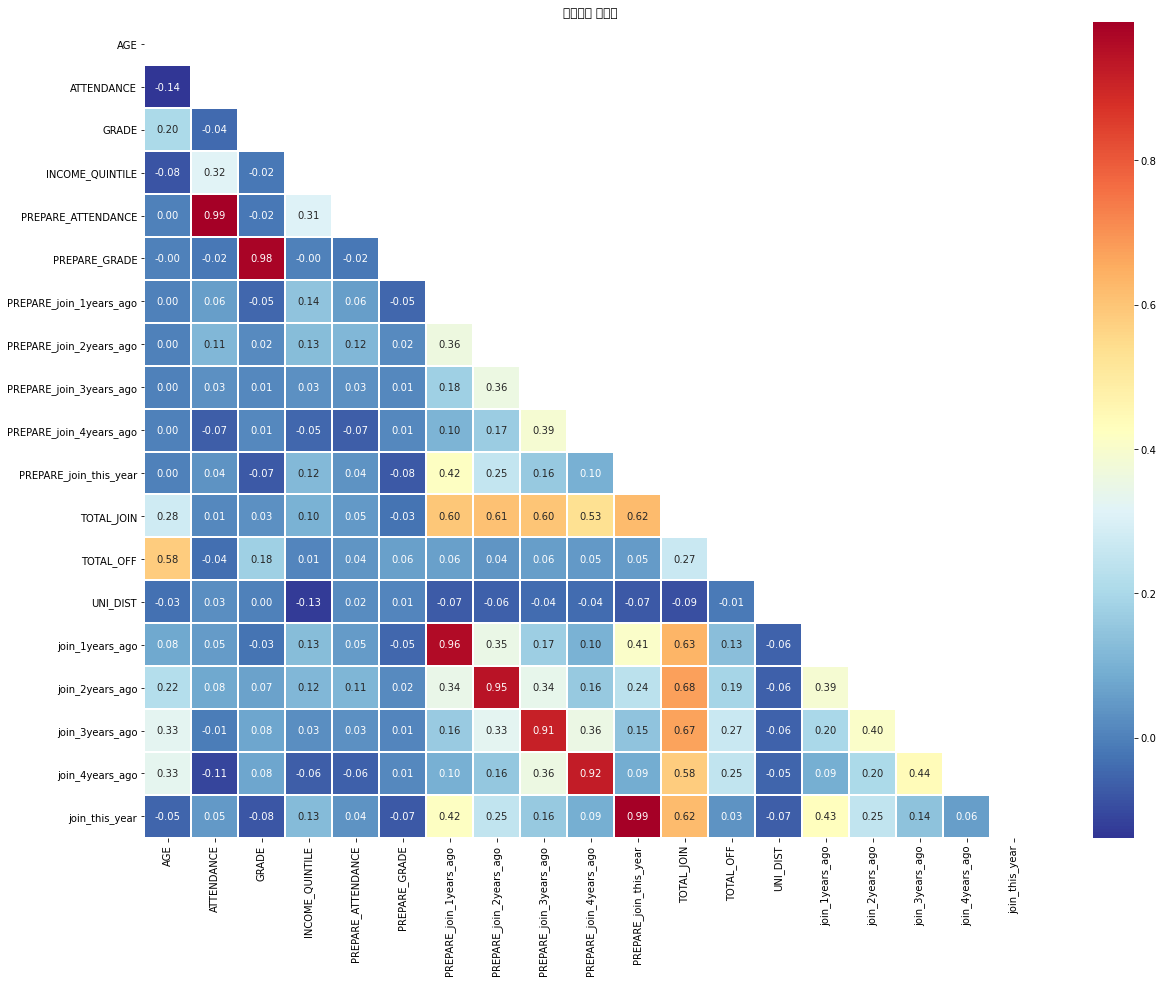

In [6]:
### 필요한 모듈 불러오기
#%matplotlib inline	# 시각화 결과를 Jupyter Notebook에서 바로 보기
# import matplotlib.pyplot as plt    # 모듈 불러오기

### 상관계수 테이블
corr = copy_student.corr()    # 'df'라는 데이터셋을 'corr'라는 이름의 상관계수 테이블로 저장 

### 상관계수 히트맵 그리기

# 히트맵 사이즈 설정
plt.figure(figsize = (20, 15))	

# 히트맵 형태 정의. 여기서는 삼각형 형태(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True

# 히트맵 그리기
sns.heatmap(data = corr,    # 'corr' = 상관계수 테이블
            annot = True,  # 히트맵에 값 표시
            mask=mask,   # 히트맵 형태. 여기서는 위에서 정의한 삼각형 형태
            fmt = '.2f',   # 값 표시 방식. 소숫점 2번째자리까지 
            linewidths = 1.,  # 경계면 실선 구분 여부
            cmap = 'RdYlBu_r')  # 사용할 색 지정 ('python colormap 검색')
plt.title('상관계수 히트맵')
plt.show()

#### 데이터가 정규분포를 이루는지 확인하기
 - 최소 최대 정규화: 모든 feature들의 스케일이 동일하지만, 이상치(outlier)를 잘 처리하지 못한다. (X - MIN) / (MAX-MIN) 
 - Z-점수 정규화(표준화) : 이상치(outlier)를 잘 처리하지만, 정확히 동일한 척도로 정규화 된 데이터를 생성하지는 않는다. (X - 평균) / 표준편차

In [7]:
plot_target = int_col(copy_student)

['AGE', 'ATTENDANCE', 'GRADE', 'INCOME_QUINTILE', 'PREPARE_ATTENDANCE', 'PREPARE_GRADE', 'PREPARE_join_1years_ago', 'PREPARE_join_2years_ago', 'PREPARE_join_3years_ago', 'PREPARE_join_4years_ago', 'PREPARE_join_this_year', 'TOTAL_JOIN', 'TOTAL_OFF', 'UNI_DIST', 'join_1years_ago', 'join_2years_ago', 'join_3years_ago', 'join_4years_ago', 'join_this_year']


AGE 의 가우시안 분포 확인


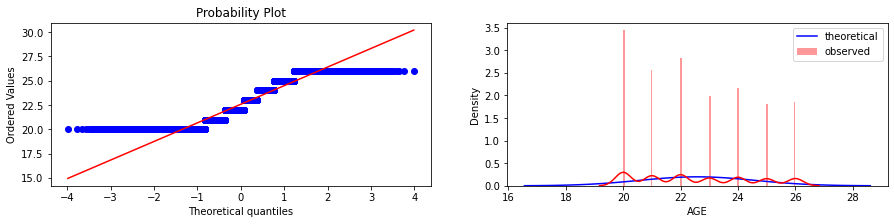


ATTENDANCE 의 가우시안 분포 확인


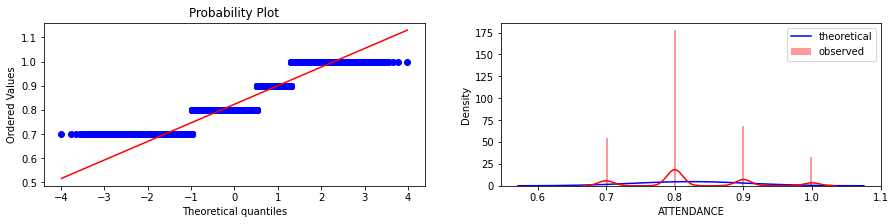


GRADE 의 가우시안 분포 확인


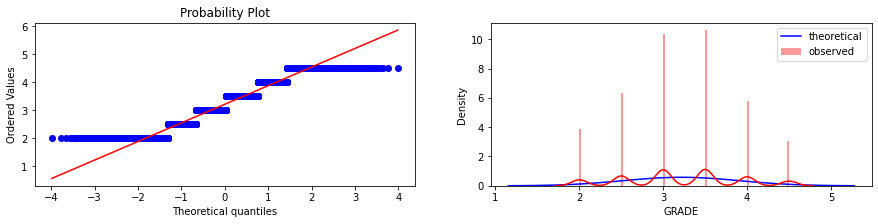


INCOME_QUINTILE 의 가우시안 분포 확인


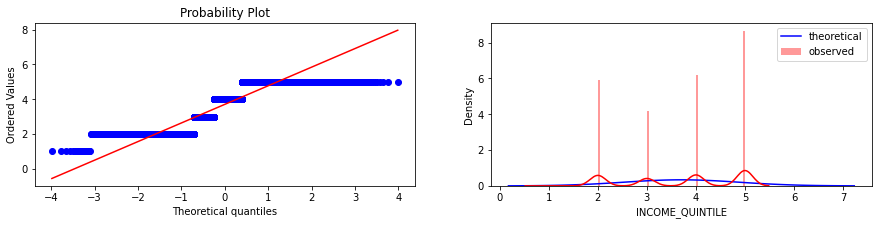


PREPARE_ATTENDANCE 의 가우시안 분포 확인


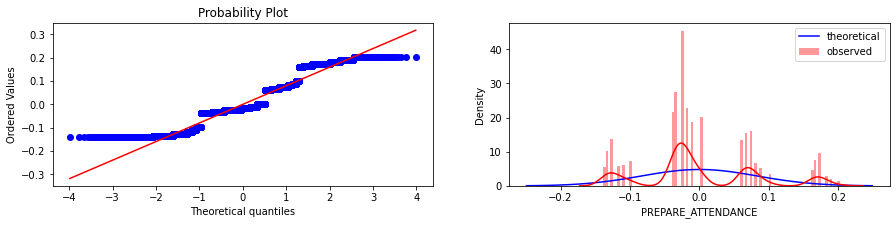


PREPARE_GRADE 의 가우시안 분포 확인


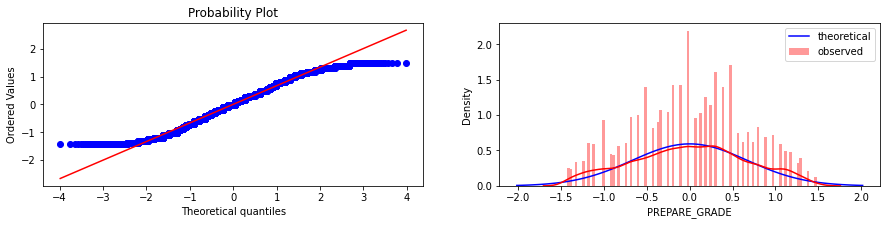


PREPARE_join_1years_ago 의 가우시안 분포 확인


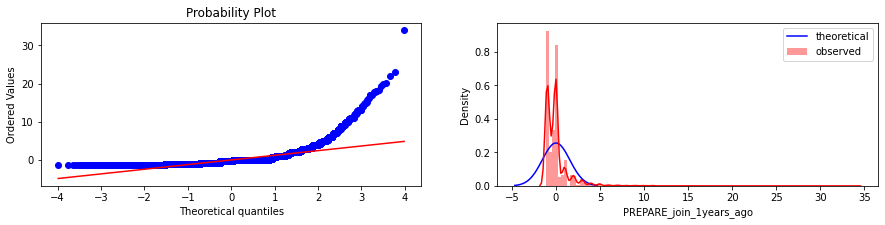


PREPARE_join_2years_ago 의 가우시안 분포 확인


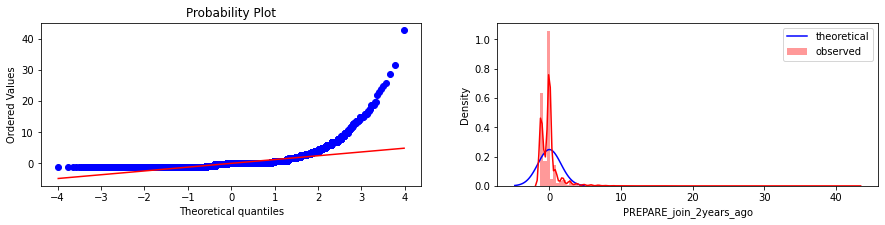


PREPARE_join_3years_ago 의 가우시안 분포 확인


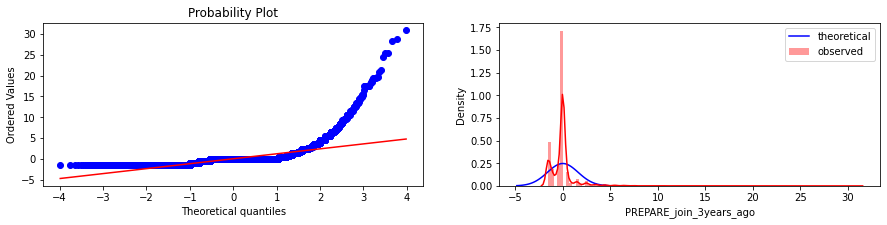


PREPARE_join_4years_ago 의 가우시안 분포 확인


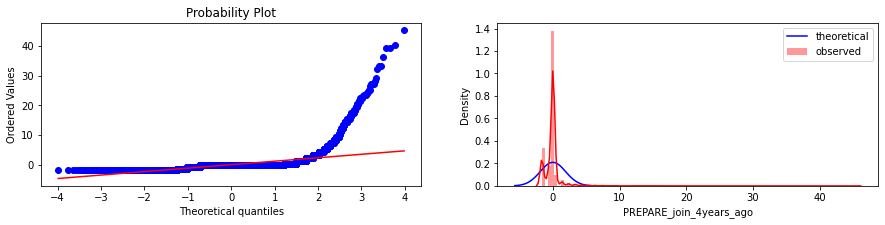


PREPARE_join_this_year 의 가우시안 분포 확인


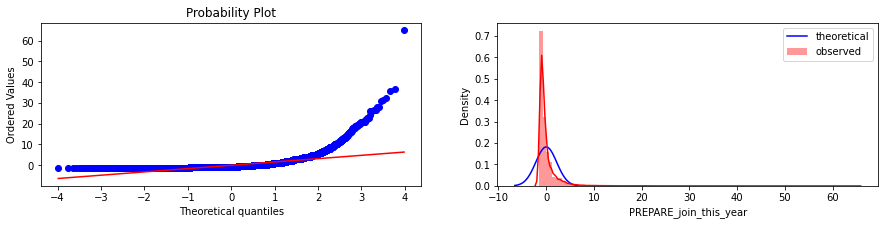


TOTAL_JOIN 의 가우시안 분포 확인


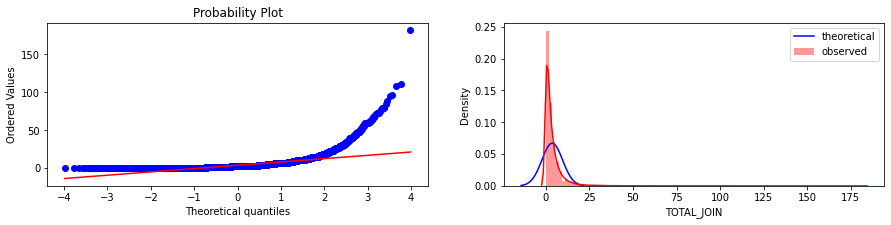


TOTAL_OFF 의 가우시안 분포 확인


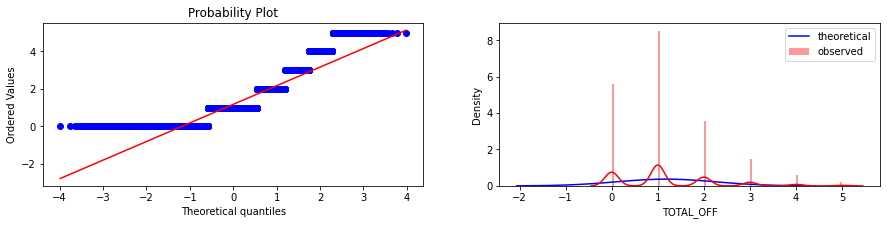


UNI_DIST 의 가우시안 분포 확인


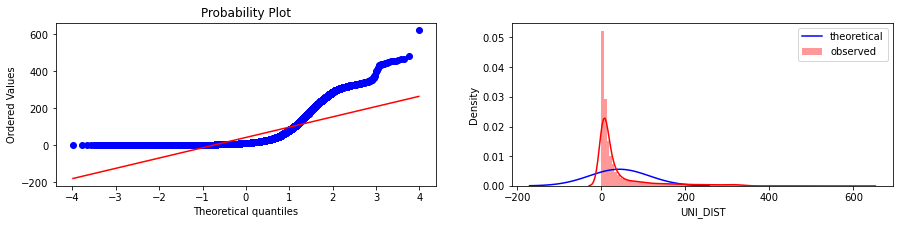


join_1years_ago 의 가우시안 분포 확인


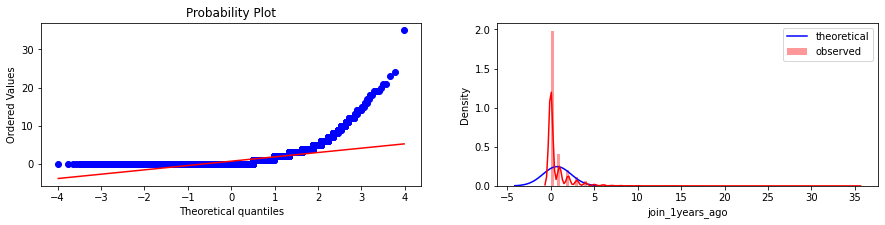


join_2years_ago 의 가우시안 분포 확인


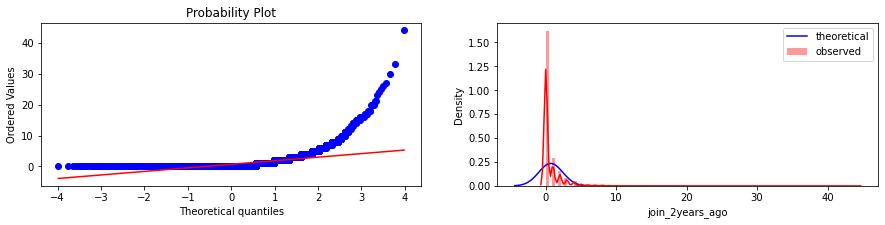


join_3years_ago 의 가우시안 분포 확인


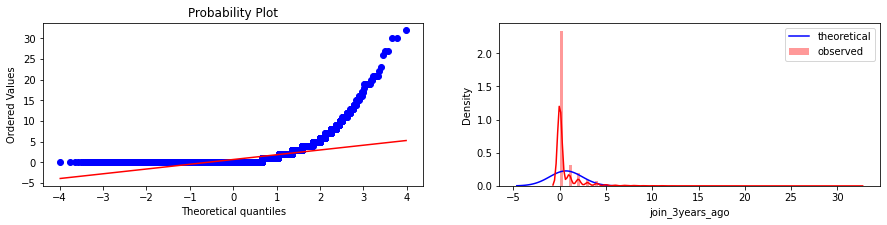


join_4years_ago 의 가우시안 분포 확인


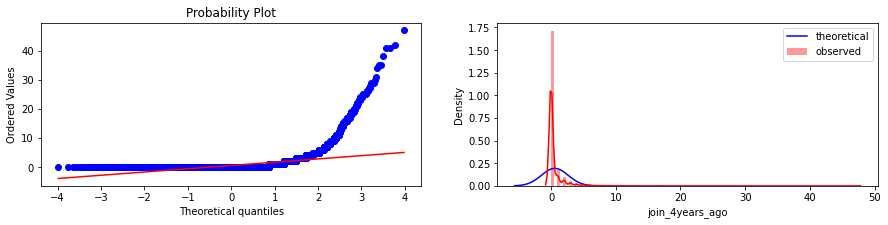


join_this_year 의 가우시안 분포 확인


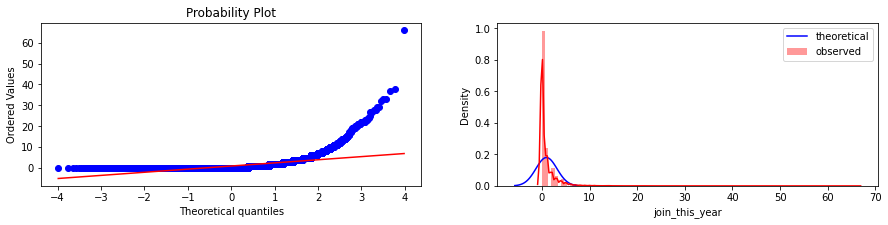

In [8]:
import scipy.stats as stats

for i in plot_target:
    print(i,"의 가우시안 분포 확인")
    fig = plt.figure(figsize=(15,3))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)

    stats.probplot(copy_student[i], dist=stats.norm,plot=ax1)

    mu = copy_student[i].mean()
    variance = copy_student[i].var()
    sigma = variance ** 0.5
    x=np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    ax2.plot(x, stats.norm.pdf(x,mu,sigma), color="blue",label="theoretical")

    sns.distplot(ax=ax2, a=copy_student[i], bins=100, color="red", label="observed")
    ax2.legend()
    plt.show()
    print()

#### stats.kstest으로 가설검증하기
 - 귀무가설은 '정규분포를 따른다' 이다.

In [9]:
for i in plot_target:
    print(i,"귀무가설의 기각 여부 확인")
    test_state, p_val = stats.kstest(copy_student[i],'norm',args=(copy_student[i].mean(), copy_student[i].var()**0.5) )
    print("Test-statistics : {:.5f}, p-value : {:.5f}".format(test_state, p_val))
    print()

AGE 귀무가설의 기각 여부 확인
Test-statistics : 0.14532, p-value : 0.00000

ATTENDANCE 귀무가설의 기각 여부 확인
Test-statistics : 0.30745, p-value : 0.00000

GRADE 귀무가설의 기각 여부 확인
Test-statistics : 0.14655, p-value : 0.00000

INCOME_QUINTILE 귀무가설의 기각 여부 확인
Test-statistics : 0.21193, p-value : 0.00000

PREPARE_ATTENDANCE 귀무가설의 기각 여부 확인
Test-statistics : 0.18707, p-value : 0.00000

PREPARE_GRADE 귀무가설의 기각 여부 확인
Test-statistics : 0.03919, p-value : 0.00000

PREPARE_join_1years_ago 귀무가설의 기각 여부 확인
Test-statistics : 0.28419, p-value : 0.00000

PREPARE_join_2years_ago 귀무가설의 기각 여부 확인
Test-statistics : 0.31942, p-value : 0.00000

PREPARE_join_3years_ago 귀무가설의 기각 여부 확인
Test-statistics : 0.35189, p-value : 0.00000

PREPARE_join_4years_ago 귀무가설의 기각 여부 확인
Test-statistics : 0.38858, p-value : 0.00000

PREPARE_join_this_year 귀무가설의 기각 여부 확인
Test-statistics : 0.25956, p-value : 0.00000

TOTAL_JOIN 귀무가설의 기각 여부 확인
Test-statistics : 0.27197, p-value : 0.00000

TOTAL_OFF 귀무가설의 기각 여부 확인
Test-statistics : 0.27245, p-value : 0.0000

##### 모든 데이터가 정규분포를 따르지 않으므로 MinMaxScaler를 이용해 정규화를 진행

In [10]:
from sklearn.preprocessing import MinMaxScaler

int_data = copy_student[plot_target]

# 인덱스 빼두기 
index = int_data.index

# MinMaxcaler 객체 생성
scaler = MinMaxScaler()

# MinMaxcaler로 데이터 셋 변환 .fit( ) 과 .transform( ) 호출
scaler.fit(int_data)

data_scaled = scaler.transform(int_data)

# int_data.loc[:,:] = data_scaled

# transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
data_scaled = pd.DataFrame(data=data_scaled, columns=int_data.columns, index=index)

print('feature 들의 정규화 최소 값')
print(data_scaled.min())
print('\nfeature 들의 정규화 최대 값')
print(data_scaled.max())

feature 들의 정규화 최소 값
AGE                        0.0
ATTENDANCE                 0.0
GRADE                      0.0
INCOME_QUINTILE            0.0
PREPARE_ATTENDANCE         0.0
PREPARE_GRADE              0.0
PREPARE_join_1years_ago    0.0
PREPARE_join_2years_ago    0.0
PREPARE_join_3years_ago    0.0
PREPARE_join_4years_ago    0.0
PREPARE_join_this_year     0.0
TOTAL_JOIN                 0.0
TOTAL_OFF                  0.0
UNI_DIST                   0.0
join_1years_ago            0.0
join_2years_ago            0.0
join_3years_ago            0.0
join_4years_ago            0.0
join_this_year             0.0
dtype: float64

feature 들의 정규화 최대 값
AGE                        1.0
ATTENDANCE                 1.0
GRADE                      1.0
INCOME_QUINTILE            1.0
PREPARE_ATTENDANCE         1.0
PREPARE_GRADE              1.0
PREPARE_join_1years_ago    1.0
PREPARE_join_2years_ago    1.0
PREPARE_join_3years_ago    1.0
PREPARE_join_4years_ago    1.0
PREPARE_join_this_year     1.0
TOTAL_JOIN    

##### label컬럼을 제외한 나머지 카테고리 데이터들은 원핫 인코딩을 진행

In [11]:
onehot_target = str_col(copy_student)

onehot_target.remove('ACADEMIC_STAT_CODE')

str_data = copy_student[onehot_target]

onehot_data = pd.get_dummies(str_data)

['ACADEMIC_STAT_CODE', 'ADMISSION', 'DOUBLE_MAJOR', 'OCCP_GRP_1', 'off_1years_ago', 'off_2years_ago', 'off_3years_ago', 'off_4years_ago', 'off_this_year']


#### 인코딩과 스케일링 데이터, 라벨을 합치고 훈련데이터와 검증데이터로 분리

In [12]:
concat_data = pd.concat([data_scaled,onehot_data,copy_student['ACADEMIC_STAT_CODE']], axis=1)

from sklearn.model_selection import train_test_split

label = 'ACADEMIC_STAT_CODE'

x_train, x_test, y_train, y_test = train_test_split(concat_data[concat_data.columns.drop(label)], concat_data[label], test_size=0.15, random_state=42)

train_0 = y_train.to_frame().loc[y_train.to_frame()['ACADEMIC_STAT_CODE'] == '유지'].count()
train_1 = y_train.to_frame().loc[y_train.to_frame()['ACADEMIC_STAT_CODE'] == '탈락'].count()
test_0 = y_test.to_frame().loc[y_test.to_frame()['ACADEMIC_STAT_CODE'] == '유지'].count()
test_1 = y_test.to_frame().loc[y_test.to_frame()['ACADEMIC_STAT_CODE'] == '탈락'].count()
 
print(train_0)
print(train_1)

print(test_0)
print(test_1)

p_100(train_1[0],train_0[0])
p_100(test_1[0],test_0[0])

ACADEMIC_STAT_CODE    16727
dtype: int64
ACADEMIC_STAT_CODE    788
dtype: int64
ACADEMIC_STAT_CODE    2959
dtype: int64
ACADEMIC_STAT_CODE    132
dtype: int64
4.5 %
4.27 %


## 군집화
 - clustering을 통해 유지하는 집단과 탈락하는 집단을 추출
 - 학습데이터셋의 중도탈락률이 4.5%.
 - 따라서 유지집단은 탈락비율의 절반인 약 2.5% 이하의 그룹, 탈락집단은 탈락비율의 2배인 약 8% 이상의 그룹으로 나눔

In [13]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#### 1차 군집

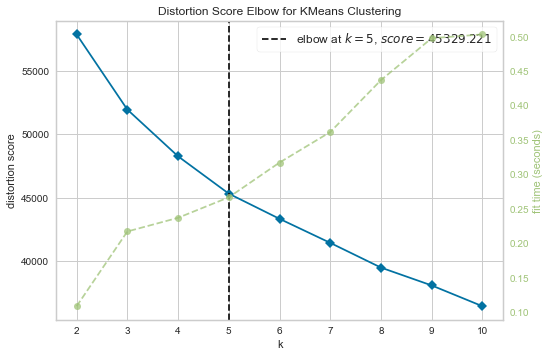

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
# # 파란선은 그룹의 변동성을 확인하는 지표 
# # 세로 점선으로 최적의 군집 개수
# # 녹색 점선은 군집을 학습할 때 걸린 시간이
from yellowbrick.cluster import KElbowVisualizer

x_train_copy = x_train.copy()
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,11))
visualizer.fit(x_train_copy)
visualizer.show()

In [15]:
from sklearn.metrics import silhouette_score

x_train_copy = x_train.copy()

k_range = range(2,11)

best_n = -1
best_silhouette_score = -1

for k in k_range:
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_train_copy)
    clusters = kmeans.predict(x_train_copy)
    
    score = silhouette_score(x_train_copy,clusters)
    print('k :', k,'score :', score)
    
    if score > best_silhouette_score:
        best_n = k
        best_silhouette_score= score
print('best n:', best_n, 'best score :', best_silhouette_score)        

k : 2 score : 0.17069881724569017
k : 3 score : 0.17110252645630064
k : 4 score : 0.1666366237836889
k : 5 score : 0.18338372776674655
k : 6 score : 0.17579253623061675
k : 7 score : 0.18417204061502027
k : 8 score : 0.17425058129539117
k : 9 score : 0.1790794249108476
k : 10 score : 0.184690371576518
best n: 10 best score : 0.184690371576518


5 개로 군집화
label  cluster
0      0          3308
       1          3819
       2          3131
       3          2042
       4          4427
1      0           126
       1           282
       2           101
       3            70
       4           209
Name: AGE, dtype: int64

0 번째 군집 중도탈락 비율 : 3.67 %
1 번째 군집 중도탈락 비율 : 6.88 %
2 번째 군집 중도탈락 비율 : 3.12 %
3 번째 군집 중도탈락 비율 : 3.31 %
4 번째 군집 중도탈락 비율 : 4.51 %

5 개로 군집화
(17515, 2)
설명력 :  0.530045701043026


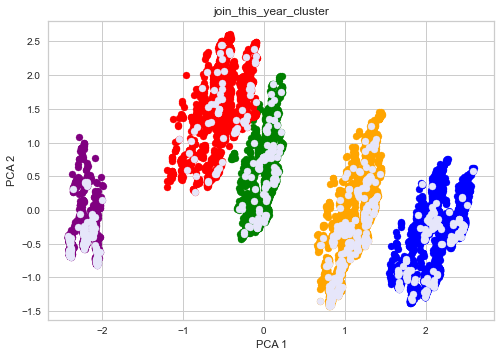

In [16]:
label_data = y_train.copy()
x_train_copy = x_train.copy()

cluster_num = 5

km = KMeans(n_clusters=cluster_num ,init='k-means++', random_state=42)
km.fit(x_train_copy)

label_data = label_data.replace('유지',0)
label_data = label_data.replace('탈락',1)

x_train_copy['label'] = label_data

x_train_copy['cluster'] = km.labels_

cluster_result = x_train_copy.groupby(['label','cluster'])['AGE'].count()
print(cluster_num,"개로 군집화")
print(cluster_result) # groupby로 정답 분포 확인
print()

if len(cluster_result[1]) >= len(cluster_result[0]):
    length = cluster_result[0].index
else:    
    length = cluster_result[1].index
    
for j in length:
    print(j,"번째 군집 중도탈락 비율 : ",end="")
    p_100(cluster_result[1][j],cluster_result[0][j])

# 차원축소
pca = PCA(n_components=2)
pca.fit(x_train_copy)
data_pca = pca.transform(x_train_copy)

print()
print(cluster_num,"개로 군집화")
print(data_pca.shape)
print("설명력 : ",sum(pca.explained_variance_ratio_))

x_train_copy['pca_x'] = data_pca[:,0]
x_train_copy['pca_y'] = data_pca[:,1]

arr = [0 for n in range(cluster_num+1)]
base_color = ['blue','orange','green','red','purple','brown','pink','gray','olive','cyan']

for j in range(0,cluster_num):
    arr[j] = x_train_copy.loc[x_train_copy['cluster'] == j].index

arr[cluster_num] = x_train_copy.loc[x_train_copy['label'] == 1].index   

for j in range(0,len(arr)-1):
    plt.scatter(x=x_train_copy.loc[arr[j],'pca_x'], y=x_train_copy.loc[arr[j],'pca_y'], color=base_color[j])

plt.scatter(x=x_train_copy.loc[arr[len(arr)-1],'pca_x'], y=x_train_copy.loc[arr[len(arr)-1],'pca_y'], color='lavender')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
globals()['{}__cluster'.format(i)] = "{}_cluster".format(i)
plt.title(globals()['{}__cluster'.format(i)])
plt.show()

#### 2차 군집
 - 1차 군집 결과 목표하던 수치를 가진 집단이 없으므로 2차 군집 진행

In [17]:
cluster_0 = x_train_copy.loc[x_train_copy['cluster'] == 0].drop(['label','cluster','pca_x','pca_y'], axis=1)
cluster_1 = x_train_copy.loc[x_train_copy['cluster'] == 1].drop(['label','cluster','pca_x','pca_y'], axis=1)
cluster_2 = x_train_copy.loc[x_train_copy['cluster'] == 2].drop(['label','cluster','pca_x','pca_y'], axis=1)
cluster_3 = x_train_copy.loc[x_train_copy['cluster'] == 3].drop(['label','cluster','pca_x','pca_y'], axis=1)
cluster_4 = x_train_copy.loc[x_train_copy['cluster'] == 4].drop(['label','cluster','pca_x','pca_y'], axis=1)

##### 2차 군집
 - 0번

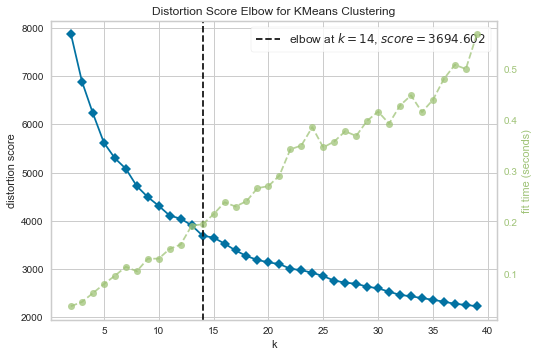

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
# # 파란선은 그룹의 변동성을 확인하는 지표 
# # 세로 점선으로 최적의 군집 개수
# # 녹색 점선은 군집을 학습할 때 걸린 시간이
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,40))
visualizer.fit(cluster_0)
visualizer.show()

In [19]:
from sklearn.metrics import silhouette_score

k_range = range(2,40)

best_n = -1
best_silhouette_score = -1

for k in k_range:
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_0)
    clusters = kmeans.predict(cluster_0)
    
    score = silhouette_score(cluster_0,clusters)
    print('k :', k,'score :', score)
    
    if score > best_silhouette_score:
        best_n = k
        best_silhouette_score= score
print('best n:', best_n, 'best score :', best_silhouette_score)        

k : 2 score : 0.18786490045000004
k : 3 score : 0.18377258914046654
k : 4 score : 0.19422042629749747
k : 5 score : 0.21521825416093227
k : 6 score : 0.22431962874257597
k : 7 score : 0.23221496074285966
k : 8 score : 0.22740740355942438
k : 9 score : 0.23172173486332978
k : 10 score : 0.24345103687423528
k : 11 score : 0.24189857505017184
k : 12 score : 0.24270122713435657
k : 13 score : 0.24850032287658624
k : 14 score : 0.2641598895199948
k : 15 score : 0.25936649401589806
k : 16 score : 0.2812535527389578
k : 17 score : 0.28642393347770767
k : 18 score : 0.29076398777748963
k : 19 score : 0.29762763220179345
k : 20 score : 0.30370073171579376
k : 21 score : 0.304992530927799
k : 22 score : 0.3156183106991428
k : 23 score : 0.31130280092965856
k : 24 score : 0.30572932894090293
k : 25 score : 0.28892556192128044
k : 26 score : 0.29183141140591257
k : 27 score : 0.3051312686883756
k : 28 score : 0.30936982888752257
k : 29 score : 0.31148284798518605
k : 30 score : 0.31882041614303896

33 개로 군집화
label  cluster
0      0          202
       1          129
       2           50
       3          376
       4           56
                 ... 
1      28           1
       29           5
       30           3
       31           2
       32           3
Name: AGE, Length: 64, dtype: int64

0 번째 군집 중도탈락 비율 : 6.05 %
1 번째 군집 중도탈락 비율 : 3.01 %
2 번째 군집 중도탈락 비율 : 1.96 %
3 번째 군집 중도탈락 비율 : 3.09 %
4 번째 군집 중도탈락 비율 : 6.67 %
5 번째 군집 중도탈락 비율 : 2.11 %
6 번째 군집 중도탈락 비율 : 3.41 %
7 번째 군집 중도탈락 비율 : 1.69 %
8 번째 군집 중도탈락 비율 : 2.94 %
9 번째 군집 중도탈락 비율 : 2.07 %
10 번째 군집 중도탈락 비율 : 2.17 %
11 번째 군집 중도탈락 비율 : 5.95 %
12 번째 군집 중도탈락 비율 : 3.37 %
13 번째 군집 중도탈락 비율 : 7.69 %
14 번째 군집 중도탈락 비율 : 4.44 %
15 번째 군집 중도탈락 비율 : 3.31 %
16 번째 군집 중도탈락 비율 : 0.82 %
17 번째 군집 중도탈락 비율 : 3.37 %
18 번째 군집 중도탈락 비율 : 2.74 %
19 번째 군집 중도탈락 비율 : 3.81 %
20 번째 군집 중도탈락 비율 : 5.56 %
21 번째 군집 중도탈락 비율 : 8.77 %
22 번째 군집 중도탈락 비율 : 4.79 %
24 번째 군집 중도탈락 비율 : 1.82 %
26 번째 군집 중도탈락 비율 : 4.76 %
27 번째 군집 중도탈락 비율 : 4.35 %
28 번째 군집 중도탈락 비율 : 1.15 %
29 번

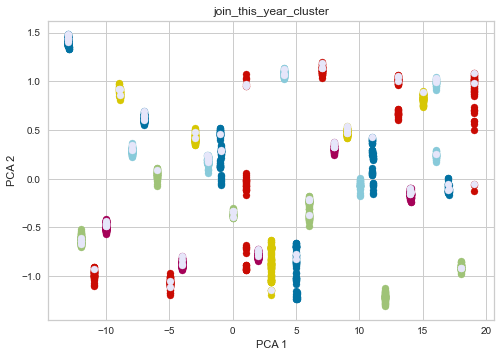

In [20]:
label_data = y_train.copy()
cluster_0_copy = cluster_0.copy()

cluster_num = 33

km = KMeans(n_clusters=cluster_num ,init='k-means++', random_state=42)
km.fit(cluster_0_copy)

label_data = label_data.replace('유지',0)
label_data = label_data.replace('탈락',1)

cluster_0_copy['label'] = label_data

cluster_0_copy['cluster'] = km.labels_

cluster_result = cluster_0_copy.groupby(['label','cluster'])['AGE'].count()
print(cluster_num,"개로 군집화")
print(cluster_result) # groupby로 정답 분포 확인
print()

if len(cluster_result[1]) >= len(cluster_result[0]):
    length = cluster_result[0].index
else:    
    length = cluster_result[1].index
    
for j in length:
    print(j,"번째 군집 중도탈락 비율 : ",end="")
    p_100(cluster_result[1][j],cluster_result[0][j])
    
# 차원축소
pca = PCA(n_components=2)
pca.fit(cluster_0_copy)
data_pca = pca.transform(cluster_0_copy)

print()
print(cluster_num,"개로 군집화")
print(data_pca.shape)
print("설명력 : ",sum(pca.explained_variance_ratio_))

cluster_0_copy['pca_x'] = data_pca[:,0]
cluster_0_copy['pca_y'] = data_pca[:,1]

arr = [0 for n in range(cluster_num+1)]

for j in range(0,cluster_num):
    arr[j] = cluster_0_copy.loc[cluster_0_copy['cluster'] == j].index

arr[cluster_num] = cluster_0_copy.loc[cluster_0_copy['label'] == 1].index   

for j in range(0,len(arr)-1):
    plt.scatter(x=cluster_0_copy.loc[arr[j],'pca_x'], y=cluster_0_copy.loc[arr[j],'pca_y'])

plt.scatter(x=cluster_0_copy.loc[arr[len(arr)-1],'pca_x'], y=cluster_0_copy.loc[arr[len(arr)-1],'pca_y'], color='lavender')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
globals()['{}__cluster'.format(i)] = "{}_cluster".format(i)
plt.title(globals()['{}__cluster'.format(i)])
plt.show()

In [21]:
list_0 = [2,5,7,9,10,16,23,24,25,28]

cluster_0_copy_N = extraction_func(cluster_0_copy,'cluster',list_0)

cluster_0_copy_N

,AGE,ATTENDANCE,GRADE,INCOME_QUINTILE,PREPARE_ATTENDANCE,PREPARE_GRADE,PREPARE_join_1years_ago,PREPARE_join_2years_ago,PREPARE_join_3years_ago,PREPARE_join_4years_ago,...,off_3years_ago_N,off_3years_ago_Y,off_4years_ago_N,off_4years_ago_Y,off_this_year_N,off_this_year_Y,label,cluster,pca_x,pca_y
20158,0.666667,1.000000,0.2,1.00,0.942161,0.206796,0.004773,0.000000,0.000000,0.000319,...,1,0,1,0,0,1,0,2,-10.973444,-0.941878
8344,0.333333,0.333333,0.0,1.00,0.330354,0.080735,0.004073,0.117398,0.048759,0.035663,...,1,0,1,0,0,1,0,2,-10.974354,-1.001831
9123,0.666667,0.000000,0.2,0.25,0.061086,0.206796,0.004773,0.136296,0.061553,0.021589,...,1,0,1,0,0,1,0,2,-10.971845,-1.019162
12014,0.833333,0.333333,1.0,1.00,0.375161,0.876572,0.041012,0.025915,0.097017,0.001345,...,1,0,1,0,0,1,0,2,-10.967768,-1.015509
14969,0.833333,0.333333,0.0,0.50,0.375161,0.018243,0.012557,0.003199,0.035463,0.022615,...,1,0,1,0,0,1,0,2,-10.979201,-0.931127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9580,0.333333,0.333333,0.6,0.75,0.330354,0.595733,0.004073,0.003817,0.048759,0.035663,...,1,0,1,0,0,1,0,28,15.023106,0.817937
2200,0.333333,0.333333,0.0,0.50,0.330354,0.080735,0.004073,0.003817,0.048759,0.035663,...,1,0,1,0,0,1,0,28,15.019633,0.828271
11774,0.666667,0.333333,0.4,0.50,0.354777,0.378462,0.004773,0.000000,0.000000,0.021589,...,1,0,1,0,0,1,0,28,15.022483,0.808258
5791,0.166667,0.666667,0.0,1.00,0.587383,0.109228,0.065009,0.028862,0.048759,0.035663,...,1,0,1,0,0,1,0,28,15.018776,0.835058


In [22]:
list_0 = [21]

cluster_0_copy_Y = extraction_func(cluster_0_copy,'cluster',list_0)

cluster_0_copy_Y

,AGE,ATTENDANCE,GRADE,INCOME_QUINTILE,PREPARE_ATTENDANCE,PREPARE_GRADE,PREPARE_join_1years_ago,PREPARE_join_2years_ago,PREPARE_join_3years_ago,PREPARE_join_4years_ago,...,off_3years_ago_N,off_3years_ago_Y,off_4years_ago_N,off_4years_ago_Y,off_this_year_N,off_this_year_Y,label,cluster,pca_x,pca_y
12510,0.333333,0.333333,0.8,0.75,0.330354,0.767398,0.004073,0.049249,0.048759,0.035663,...,1,0,1,0,1,0,0,21,8.023815,0.307719
10084,0.333333,0.666667,0.6,1.00,0.624046,0.595733,0.146349,0.026533,0.048759,0.035663,...,1,0,1,0,1,0,0,21,8.021965,0.321859
13163,0.166667,1.000000,0.4,1.00,0.881075,0.452559,0.008099,0.028862,0.048759,0.035663,...,1,0,1,0,1,0,1,21,8.020596,0.373300
10537,0.833333,0.333333,0.4,1.00,0.375161,0.361575,0.041012,0.025915,0.004687,0.001345,...,1,0,1,0,1,0,0,21,8.021668,0.277691
6224,0.833333,0.333333,0.6,0.25,0.375161,0.533240,0.012557,0.003199,0.004687,0.043885,...,1,0,1,0,1,0,0,21,8.023618,0.302582
10327,0.833333,0.333333,0.4,1.00,0.375161,0.361575,0.041012,0.003199,0.004687,0.043885,...,1,0,1,0,1,0,0,21,8.021679,0.276001
4950,0.666667,0.333333,0.4,1.00,0.354777,0.378462,0.004773,0.045432,0.030777,0.064129,...,1,0,1,0,1,0,0,21,8.021516,0.281229
14032,0.333333,0.333333,1.0,1.00,0.330354,0.939064,0.004073,0.003817,0.048759,0.035663,...,1,0,1,0,1,0,1,21,8.024863,0.322574
2246,0.333333,0.333333,0.4,1.00,0.330354,0.424067,0.060983,0.071965,0.048759,0.035663,...,1,0,1,0,1,0,0,21,8.021103,0.293440
12482,0.333333,0.333333,0.4,1.00,0.330354,0.424067,0.032528,0.049249,0.048759,0.035663,...,1,0,1,0,1,0,0,21,8.021136,0.293861


In [23]:
# list_0 = [6,7]

# cluster_0_copy_N = extraction_func(cluster_0_copy,'cluster',list_0)

# cluster_0_copy_N

##### 2차 군집
 - 1번

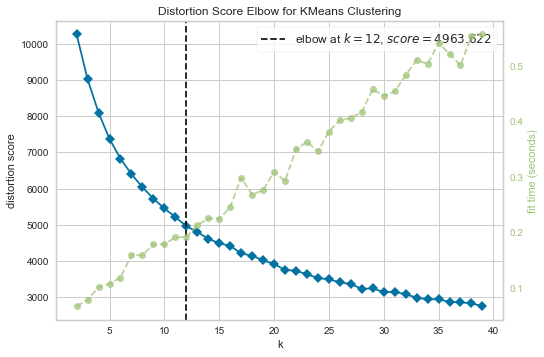

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
# # 파란선은 그룹의 변동성을 확인하는 지표 
# # 세로 점선으로 최적의 군집 개수
# # 녹색 점선은 군집을 학습할 때 걸린 시간이
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,40))
visualizer.fit(cluster_1)
visualizer.show()

In [25]:
from sklearn.metrics import silhouette_score

k_range = range(2,40)

best_n = -1
best_silhouette_score = -1

for k in k_range:
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_1)
    clusters = kmeans.predict(cluster_1)
    
    score = silhouette_score(cluster_1,clusters)
    print('k :', k,'score :', score)
    
    if score > best_silhouette_score:
        best_n = k
        best_silhouette_score= score
print('best n:', best_n, 'best score :', best_silhouette_score)        

k : 2 score : 0.17921363704565926
k : 3 score : 0.1881021705536906
k : 4 score : 0.1922475720692981
k : 5 score : 0.19641724671229308
k : 6 score : 0.17335169708517786
k : 7 score : 0.1984107957180855
k : 8 score : 0.2171149266408477
k : 9 score : 0.2346930012873471
k : 10 score : 0.22880330793987178
k : 11 score : 0.23233875422177774
k : 12 score : 0.2464655972957888
k : 13 score : 0.2568545448861426
k : 14 score : 0.25366216859021495
k : 15 score : 0.2776057484267012
k : 16 score : 0.27019732780352534
k : 17 score : 0.2772516075664323
k : 18 score : 0.2764837989289486
k : 19 score : 0.2567418843648634
k : 20 score : 0.29862035019953953
k : 21 score : 0.3075870133175953
k : 22 score : 0.3069686656446293
k : 23 score : 0.31913154208358696
k : 24 score : 0.2943869461212038
k : 25 score : 0.2951851763449006
k : 26 score : 0.3294428882408097
k : 27 score : 0.3291245313940815
k : 28 score : 0.3389977077775473
k : 29 score : 0.3154269057129188
k : 30 score : 0.3468923755284124
k : 31 score 

30 개로 군집화
label  cluster
0      0           73
       1          350
       2           95
       3          231
       4          182
       5          148
       6          176
       7          213
       8          108
       9          112
       10         112
       11          18
       12         115
       13         106
       14          47
       15         134
       16         275
       17         127
       18          99
       19          45
       20          59
       21          90
       22         116
       23          74
       24          77
       25         243
       26         152
       27          92
       28          45
       29         105
1      0            4
       1           21
       2           12
       3           24
       4           25
       5            4
       6           14
       7           15
       8            7
       9            5
       10           3
       11           1
       12           7
       13          12
       

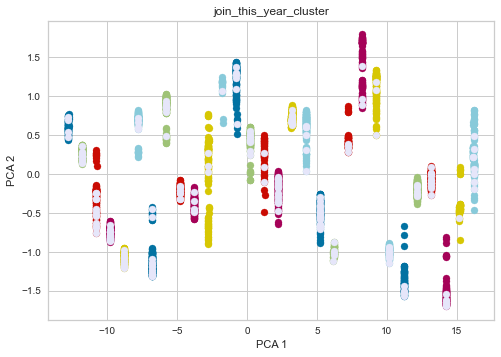

In [26]:
label_data = y_train.copy()
cluster_1_copy = cluster_1.copy()

cluster_num = 30

km = KMeans(n_clusters=cluster_num ,init='k-means++', random_state=42)
km.fit(cluster_1_copy)

label_data = label_data.replace('유지',0)
label_data = label_data.replace('탈락',1)

cluster_1_copy['label'] = label_data

cluster_1_copy['cluster'] = km.labels_

cluster_result = cluster_1_copy.groupby(['label','cluster'])['AGE'].count()
print(cluster_num,"개로 군집화")
print(cluster_result) # groupby로 정답 분포 확인
print()

if len(cluster_result[1]) >= len(cluster_result[0]):
    length = cluster_result[0].index
else:    
    length = cluster_result[1].index
    
for j in length:
    print(j,"번째 군집 중도탈락 비율 : ",end="")
    p_100(cluster_result[1][j],cluster_result[0][j])

# 차원축소
pca = PCA(n_components=2)
pca.fit(cluster_1_copy)
data_pca = pca.transform(cluster_1_copy)

print()
print(cluster_num,"개로 군집화")
print(data_pca.shape)
print("설명력 : ",sum(pca.explained_variance_ratio_))

cluster_1_copy['pca_x'] = data_pca[:,0]
cluster_1_copy['pca_y'] = data_pca[:,1]

arr = [0 for n in range(cluster_num+1)]

for j in range(0,cluster_num):
    arr[j] = cluster_1_copy.loc[cluster_1_copy['cluster'] == j].index

arr[cluster_num] = cluster_1_copy.loc[cluster_1_copy['label'] == 1].index   

for j in range(0,len(arr)-1):
    plt.scatter(x=cluster_1_copy.loc[arr[j],'pca_x'], y=cluster_1_copy.loc[arr[j],'pca_y'])

plt.scatter(x=cluster_1_copy.loc[arr[len(arr)-1],'pca_x'], y=cluster_1_copy.loc[arr[len(arr)-1],'pca_y'], color='lavender')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
globals()['{}__cluster'.format(i)] = "{}_cluster".format(i)
plt.title(globals()['{}__cluster'.format(i)])
plt.show()

In [27]:
list_1 = [2,3,4,13,15,18,19,23]

cluster_1_copy_Y = extraction_func(cluster_1_copy,'cluster',list_1)

cluster_1_copy_Y

,AGE,ATTENDANCE,GRADE,INCOME_QUINTILE,PREPARE_ATTENDANCE,PREPARE_GRADE,PREPARE_join_1years_ago,PREPARE_join_2years_ago,PREPARE_join_3years_ago,PREPARE_join_4years_ago,...,off_3years_ago_N,off_3years_ago_Y,off_4years_ago_N,off_4years_ago_Y,off_this_year_N,off_this_year_Y,label,cluster,pca_x,pca_y
3386,0.833333,0.000000,0.0,0.25,0.081470,0.018243,0.012557,0.003199,0.004687,0.043885,...,1,0,0,1,1,0,1,2,-10.789494,-0.448237
11930,1.000000,0.333333,0.4,0.50,0.412617,0.343331,0.023877,0.013033,0.015146,0.021270,...,1,0,0,1,1,0,0,2,-10.808274,-0.218505
9237,0.666667,0.333333,0.2,0.75,0.354777,0.206796,0.004773,0.045432,0.061553,0.042859,...,1,0,0,1,1,0,0,2,-10.810719,-0.280350
4771,0.833333,0.333333,0.8,1.00,0.375161,0.704906,0.012557,0.071347,0.035463,0.001345,...,1,0,0,1,1,0,0,2,-10.807625,-0.223152
196,1.000000,0.000000,0.4,0.50,0.118925,0.343331,0.023877,0.013033,0.015146,0.085079,...,1,0,0,1,1,0,0,2,-10.783020,-0.370579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14295,0.166667,0.000000,0.2,0.75,0.000000,0.280894,0.036554,0.028862,0.048759,0.035663,...,1,0,1,0,1,0,0,23,10.186866,-0.935053
14060,0.333333,0.333333,0.6,0.25,0.330354,0.595733,0.004073,0.003817,0.048759,0.035663,...,1,0,1,0,1,0,0,23,10.188863,-0.949581
10150,0.166667,1.000000,0.0,0.75,0.881075,0.109228,0.008099,0.028862,0.048759,0.035663,...,1,0,1,0,1,0,0,23,10.185962,-1.091161
14512,0.166667,0.666667,0.4,0.50,0.587383,0.452559,0.008099,0.028862,0.048759,0.035663,...,1,0,1,0,1,0,1,23,10.186829,-1.059375


In [28]:
list_1 = [22,28]

cluster_1_copy_N = extraction_func(cluster_1_copy,'cluster',list_1)

cluster_1_copy_N.head()

,AGE,ATTENDANCE,GRADE,INCOME_QUINTILE,PREPARE_ATTENDANCE,PREPARE_GRADE,PREPARE_join_1years_ago,PREPARE_join_2years_ago,PREPARE_join_3years_ago,PREPARE_join_4years_ago,...,off_3years_ago_N,off_3years_ago_Y,off_4years_ago_N,off_4years_ago_Y,off_this_year_N,off_this_year_Y,label,cluster,pca_x,pca_y
4205,0.833333,1.000000,0.8,1.00,0.962545,0.704906,0.012557,0.025915,0.035463,0.001345,...,0,1,0,1,1,0,0,22,9.224502,0.969488
14412,1.000000,0.666667,0.6,1.00,0.706308,0.514997,0.023877,0.013033,0.076699,0.000000,...,0,1,0,1,1,0,0,22,9.228396,1.040923
7588,0.833333,0.333333,0.8,1.00,0.375161,0.704906,0.012557,0.003199,0.035463,0.001345,...,0,1,0,1,1,0,0,22,9.225550,0.954718
3204,1.000000,0.333333,0.2,1.00,0.412617,0.171666,0.023877,0.058465,0.015146,0.021270,...,0,1,0,1,1,0,0,22,9.201901,1.275958
3269,1.000000,0.333333,1.0,0.75,0.412617,0.858328,0.023877,0.013033,0.015146,0.021270,...,0,1,0,1,1,0,0,22,9.204577,1.302464


In [29]:
# list_1 = [1,9,11]

# cluster_1_copy_Y = extraction_func(cluster_1_copy,'cluster',list_1)

# cluster_1_copy_Y

#### 2차 군집
 - 2번

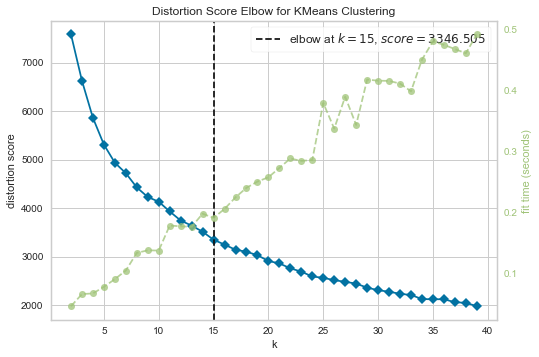

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
# # 파란선은 그룹의 변동성을 확인하는 지표 
# # 세로 점선으로 최적의 군집 개수
# # 녹색 점선은 군집을 학습할 때 걸린 시간이
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,40))
visualizer.fit(cluster_2)
visualizer.show()

In [31]:
from sklearn.metrics import silhouette_score

k_range = range(2,40)

best_n = -1
best_silhouette_score = -1

for k in k_range:
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_2)
    clusters = kmeans.predict(cluster_2)
    
    score = silhouette_score(cluster_2,clusters)
    print('k :', k,'score :', score)
    
    if score > best_silhouette_score:
        best_n = k
        best_silhouette_score= score
print('best n:', best_n, 'best score :', best_silhouette_score)        

k : 2 score : 0.18565331458490117
k : 3 score : 0.19359055364612124
k : 4 score : 0.19733380096913822
k : 5 score : 0.1982166752342476
k : 6 score : 0.22629572425727046
k : 7 score : 0.18495549704252487
k : 8 score : 0.20605948912059063
k : 9 score : 0.21891610050741717
k : 10 score : 0.21984063430585946
k : 11 score : 0.24180164671631793
k : 12 score : 0.24500209449336688
k : 13 score : 0.25573024893153384
k : 14 score : 0.26292532730685153
k : 15 score : 0.2734036751710648
k : 16 score : 0.2799367561581489
k : 17 score : 0.29001770172885727
k : 18 score : 0.25646194093479496
k : 19 score : 0.2937875169736826
k : 20 score : 0.305830854694619
k : 21 score : 0.2713528866352053
k : 22 score : 0.2826438939568703
k : 23 score : 0.2931415704401648
k : 24 score : 0.2996031467077709
k : 25 score : 0.30146566421866666
k : 26 score : 0.325077137579765
k : 27 score : 0.2974390561519099
k : 28 score : 0.28282544072056665
k : 29 score : 0.3000335979443058
k : 30 score : 0.33537303532716506
k : 31 

35 개로 군집화
label  cluster
0      0           56
       1          367
       2           64
       3          121
       4           41
                 ... 
1      29           3
       31           1
       32           2
       33           4
       34           2
Name: AGE, Length: 67, dtype: int64

0 번째 군집 중도탈락 비율 : 5.08 %
1 번째 군집 중도탈락 비율 : 2.39 %
2 번째 군집 중도탈락 비율 : 1.54 %
3 번째 군집 중도탈락 비율 : 3.2 %
4 번째 군집 중도탈락 비율 : 6.82 %
5 번째 군집 중도탈락 비율 : 2.67 %
6 번째 군집 중도탈락 비율 : 5.34 %
7 번째 군집 중도탈락 비율 : 2.55 %
8 번째 군집 중도탈락 비율 : 8.0 %
9 번째 군집 중도탈락 비율 : 2.52 %
10 번째 군집 중도탈락 비율 : 0.95 %
11 번째 군집 중도탈락 비율 : 0.9 %
12 번째 군집 중도탈락 비율 : 4.55 %
13 번째 군집 중도탈락 비율 : 2.0 %
14 번째 군집 중도탈락 비율 : 5.06 %
15 번째 군집 중도탈락 비율 : 3.85 %
16 번째 군집 중도탈락 비율 : 3.45 %
17 번째 군집 중도탈락 비율 : 2.22 %
18 번째 군집 중도탈락 비율 : 1.06 %
19 번째 군집 중도탈락 비율 : 2.41 %
20 번째 군집 중도탈락 비율 : 3.33 %
21 번째 군집 중도탈락 비율 : 4.35 %
22 번째 군집 중도탈락 비율 : 6.1 %
23 번째 군집 중도탈락 비율 : 7.69 %
24 번째 군집 중도탈락 비율 : 6.78 %
27 번째 군집 중도탈락 비율 : 4.17 %
28 번째 군집 중도탈락 비율 : 2.08 %
29 번째 군집 

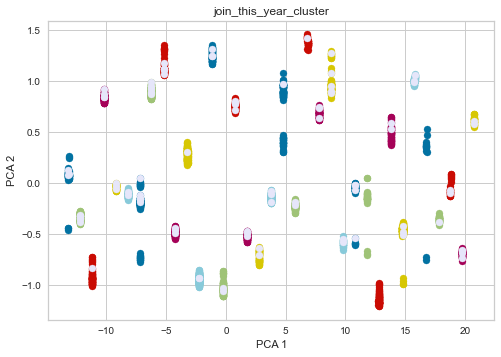

In [32]:
label_data = y_train.copy()
cluster_2_copy = cluster_2.copy()

cluster_num = 35

km = KMeans(n_clusters=cluster_num ,init='k-means++', random_state=42)
km.fit(cluster_2_copy)

label_data = label_data.replace('유지',0)
label_data = label_data.replace('탈락',1)

cluster_2_copy['label'] = label_data

cluster_2_copy['cluster'] = km.labels_

cluster_result = cluster_2_copy.groupby(['label','cluster'])['AGE'].count()
print(cluster_num,"개로 군집화")
print(cluster_result) # groupby로 정답 분포 확인
print()

if len(cluster_result[1]) >= len(cluster_result[0]):
    length = cluster_result[0].index
else:    
    length = cluster_result[1].index
    
for j in length:
    print(j,"번째 군집 중도탈락 비율 : ",end="")
    p_100(cluster_result[1][j],cluster_result[0][j])

# 차원축소
pca = PCA(n_components=2)
pca.fit(cluster_2_copy)
data_pca = pca.transform(cluster_2_copy)

print()
print(cluster_num,"개로 군집화")
print(data_pca.shape)
print("설명력 : ",sum(pca.explained_variance_ratio_))

cluster_2_copy['pca_x'] = data_pca[:,0]
cluster_2_copy['pca_y'] = data_pca[:,1]

arr = [0 for n in range(cluster_num+1)]

for j in range(0,cluster_num):
    arr[j] = cluster_2_copy.loc[cluster_2_copy['cluster'] == j].index

arr[cluster_num] = cluster_2_copy.loc[cluster_2_copy['label'] == 1].index   

for j in range(0,len(arr)-1):
    plt.scatter(x=cluster_2_copy.loc[arr[j],'pca_x'], y=cluster_2_copy.loc[arr[j],'pca_y'])

plt.scatter(x=cluster_2_copy.loc[arr[len(arr)-1],'pca_x'], y=cluster_2_copy.loc[arr[len(arr)-1],'pca_y'], color='lavender')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
globals()['{}__cluster'.format(i)] = "{}_cluster".format(i)
plt.title(globals()['{}__cluster'.format(i)])
plt.show()

In [33]:
list_2 = [1,2,7,10,11,13,17,18,19,28,31]

cluster_2_copy_N = extraction_func(cluster_2_copy,'cluster',list_2)

cluster_2_copy_N

,AGE,ATTENDANCE,GRADE,INCOME_QUINTILE,PREPARE_ATTENDANCE,PREPARE_GRADE,PREPARE_join_1years_ago,PREPARE_join_2years_ago,PREPARE_join_3years_ago,PREPARE_join_4years_ago,...,off_3years_ago_N,off_3years_ago_Y,off_4years_ago_N,off_4years_ago_Y,off_this_year_N,off_this_year_Y,label,cluster,pca_x,pca_y
5226,0.333333,0.666667,0.2,0.50,0.624046,0.252401,0.004073,0.026533,0.048759,0.035663,...,1,0,1,0,1,0,0,1,-12.245134,-0.352045
8568,0.166667,0.000000,0.2,0.25,0.000000,0.280894,0.093464,0.028862,0.048759,0.035663,...,1,0,1,0,1,0,0,1,-12.246061,-0.363525
5376,0.166667,1.000000,0.4,0.50,0.881075,0.452559,0.036554,0.028862,0.048759,0.035663,...,1,0,1,0,1,0,0,1,-12.246300,-0.354510
1158,0.166667,0.333333,0.0,1.00,0.293692,0.109228,0.093464,0.028862,0.048759,0.035663,...,1,0,1,0,1,0,0,1,-12.247119,-0.385409
1247,0.166667,1.000000,0.4,0.50,0.881075,0.452559,0.008099,0.028862,0.048759,0.035663,...,1,0,1,0,1,0,0,1,-12.246267,-0.353809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17586,0.666667,0.333333,0.6,1.00,0.354777,0.550128,0.061683,0.000000,0.030777,0.000319,...,0,1,1,0,1,0,0,31,17.793904,-0.349231
17988,0.833333,0.333333,0.2,1.00,0.375161,0.189909,0.041012,0.003199,0.004687,0.022615,...,0,1,1,0,1,0,0,31,17.794188,-0.364585
6882,0.500000,1.000000,0.6,0.50,0.919231,0.577615,0.000000,0.068643,0.092769,0.035663,...,0,1,1,0,1,0,0,31,17.792181,-0.364994
17209,0.666667,0.333333,0.0,0.25,0.354777,0.035131,0.004773,0.000000,0.030777,0.000319,...,0,1,1,0,1,0,0,31,17.792389,-0.391033


In [34]:
list_2 = [8]

cluster_2_copy_Y = extraction_func(cluster_2_copy,'cluster',list_2)

cluster_2_copy_Y

,AGE,ATTENDANCE,GRADE,INCOME_QUINTILE,PREPARE_ATTENDANCE,PREPARE_GRADE,PREPARE_join_1years_ago,PREPARE_join_2years_ago,PREPARE_join_3years_ago,PREPARE_join_4years_ago,...,off_3years_ago_N,off_3years_ago_Y,off_4years_ago_N,off_4years_ago_Y,off_this_year_N,off_this_year_Y,label,cluster,pca_x,pca_y
14499,0.666667,0.666667,0.4,1.00,0.648469,0.378462,0.061683,0.000000,0.000000,0.000319,...,0,1,1,0,1,0,1,8,-5.199372,1.108022
6161,0.833333,0.333333,0.2,0.75,0.375161,0.189909,0.012557,0.003199,0.097017,0.043885,...,0,1,1,0,1,0,0,8,-5.203944,1.091943
19795,1.000000,0.333333,0.8,0.25,0.412617,0.686663,0.023877,0.013033,0.015146,0.021270,...,0,1,1,0,1,0,0,8,-5.183515,1.152020
4548,0.666667,0.333333,0.2,0.50,0.354777,0.206796,0.033228,0.000000,0.000000,0.000319,...,0,1,1,0,1,0,0,8,-5.205469,1.076854
222,1.000000,0.000000,0.8,0.50,0.118925,0.686663,0.023877,0.081181,0.353689,0.340317,...,0,1,1,0,1,0,0,8,-5.199896,1.161073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13832,0.500000,0.333333,0.8,1.00,0.331848,0.749281,0.000000,0.045927,0.123546,0.035663,...,0,1,1,0,1,0,0,8,-5.199478,1.115164
20141,1.000000,0.333333,1.0,0.25,0.412617,0.858328,0.023877,0.013033,0.015146,0.042540,...,0,1,1,0,1,0,0,8,-5.194396,1.182491
5104,0.500000,0.333333,0.4,0.75,0.331848,0.405950,0.170730,0.068643,0.031216,0.035663,...,0,1,1,0,1,0,0,8,-5.200731,1.084607
19541,1.000000,0.333333,0.6,0.50,0.412617,0.514997,0.023877,0.013033,0.045922,0.000000,...,0,1,1,0,1,0,0,8,-5.190710,1.313907


In [35]:
# list_2 = [3,6,14]

# cluster_2_copy_N = extraction_func(cluster_2_copy,'cluster',list_2)

# cluster_2_copy_N

##### 2차 군집
 - 3번

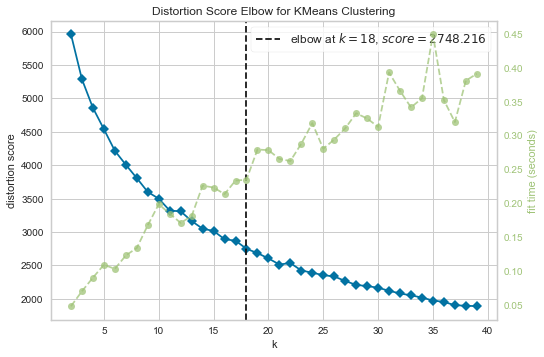

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
# # 파란선은 그룹의 변동성을 확인하는 지표 
# # 세로 점선으로 최적의 군집 개수
# # 녹색 점선은 군집을 학습할 때 걸린 시간이
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,40))
visualizer.fit(cluster_3)
visualizer.show()

In [37]:
from sklearn.metrics import silhouette_score

k_range = range(2,40)

best_n = -1
best_silhouette_score = -1

for k in k_range:
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_3)
    clusters = kmeans.predict(cluster_3)
    
    score = silhouette_score(cluster_3,clusters)
    print('k :', k,'score :', score)
    
    if score > best_silhouette_score:
        best_n = k
        best_silhouette_score= score
print('best n:', best_n, 'best score :', best_silhouette_score)        

k : 2 score : 0.18395376183697823
k : 3 score : 0.1668718873762164
k : 4 score : 0.17108247578377506
k : 5 score : 0.16237392355513583
k : 6 score : 0.1761506962916231
k : 7 score : 0.1888798188174352
k : 8 score : 0.18133294411287174
k : 9 score : 0.19780924941543007
k : 10 score : 0.19610783786188796
k : 11 score : 0.21284402880788972
k : 12 score : 0.18697297192879087
k : 13 score : 0.20020704477221646
k : 14 score : 0.2130962905609867
k : 15 score : 0.21415009310131275
k : 16 score : 0.21086436139714732
k : 17 score : 0.22616235198949336
k : 18 score : 0.22689385654177707
k : 19 score : 0.22971083550422133
k : 20 score : 0.22892732234375052
k : 21 score : 0.23948958500744
k : 22 score : 0.21983043029463092
k : 23 score : 0.24250829251645759
k : 24 score : 0.24991115634976618
k : 25 score : 0.2534458158750428
k : 26 score : 0.24313602637482545
k : 27 score : 0.25627975593152524
k : 28 score : 0.26658711769796284
k : 29 score : 0.267789075150765
k : 30 score : 0.2696092998416364
k : 

37 개로 군집화
label  cluster
0      0           46
       1          131
       2           59
       3           52
       4           60
                 ... 
1      32           1
       33           2
       34           2
       35           2
       36           1
Name: AGE, Length: 67, dtype: int64

0 번째 군집 중도탈락 비율 : 4.17 %
1 번째 군집 중도탈락 비율 : 3.68 %
2 번째 군집 중도탈락 비율 : 7.81 %
4 번째 군집 중도탈락 비율 : 3.23 %
5 번째 군집 중도탈락 비율 : 1.11 %
6 번째 군집 중도탈락 비율 : 1.06 %
7 번째 군집 중도탈락 비율 : 4.32 %
8 번째 군집 중도탈락 비율 : 1.69 %
9 번째 군집 중도탈락 비율 : 2.63 %
13 번째 군집 중도탈락 비율 : 5.08 %
14 번째 군집 중도탈락 비율 : 4.65 %
15 번째 군집 중도탈락 비율 : 3.39 %
16 번째 군집 중도탈락 비율 : 8.82 %
18 번째 군집 중도탈락 비율 : 2.63 %
19 번째 군집 중도탈락 비율 : 2.22 %
20 번째 군집 중도탈락 비율 : 2.33 %
21 번째 군집 중도탈락 비율 : 11.54 %
23 번째 군집 중도탈락 비율 : 6.67 %
24 번째 군집 중도탈락 비율 : 4.92 %
25 번째 군집 중도탈락 비율 : 1.96 %
26 번째 군집 중도탈락 비율 : 3.7 %
27 번째 군집 중도탈락 비율 : 3.85 %
29 번째 군집 중도탈락 비율 : 5.95 %
30 번째 군집 중도탈락 비율 : 3.23 %
31 번째 군집 중도탈락 비율 : 3.33 %
32 번째 군집 중도탈락 비율 : 2.56 %
33 번째 군집 중도탈락 비율 : 4.35 %
34 

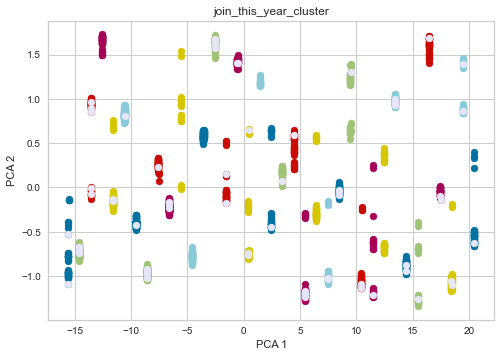

In [38]:
label_data = y_train.copy()
cluster_3_copy = cluster_3.copy()

cluster_num = 37

km = KMeans(n_clusters=cluster_num ,init='k-means++', random_state=42)
km.fit(cluster_3_copy)

label_data = label_data.replace('유지',0)
label_data = label_data.replace('탈락',1)

cluster_3_copy['label'] = label_data

cluster_3_copy['cluster'] = km.labels_

cluster_result = cluster_3_copy.groupby(['label','cluster'])['AGE'].count()
print(cluster_num,"개로 군집화")
print(cluster_result) # groupby로 정답 분포 확인
print()

if len(cluster_result[1]) >= len(cluster_result[0]):
    length = cluster_result[0].index
else:    
    length = cluster_result[1].index
    
for j in length:
    print(j,"번째 군집 중도탈락 비율 : ",end="")
    p_100(cluster_result[1][j],cluster_result[0][j])

# 차원축소
pca = PCA(n_components=2)
pca.fit(cluster_3_copy)
data_pca = pca.transform(cluster_3_copy)

print()
print(cluster_num,"개로 군집화")
print(data_pca.shape)
print("설명력 : ",sum(pca.explained_variance_ratio_))

cluster_3_copy['pca_x'] = data_pca[:,0]
cluster_3_copy['pca_y'] = data_pca[:,1]

arr = [0 for n in range(cluster_num+1)]

for j in range(0,cluster_num):
    arr[j] = cluster_3_copy.loc[cluster_3_copy['cluster'] == j].index

arr[cluster_num] = cluster_3_copy.loc[cluster_3_copy['label'] == 1].index   

for j in range(0,len(arr)-1):
    plt.scatter(x=cluster_3_copy.loc[arr[j],'pca_x'], y=cluster_3_copy.loc[arr[j],'pca_y'])

plt.scatter(x=cluster_3_copy.loc[arr[len(arr)-1],'pca_x'], y=cluster_3_copy.loc[arr[len(arr)-1],'pca_y'], color='lavender')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
globals()['{}__cluster'.format(i)] = "{}_cluster".format(i)
plt.title(globals()['{}__cluster'.format(i)])
plt.show()

In [39]:
list_3 = [3,5,6,8,10,11,12,17,19,20,22,25,28,32,36]

cluster_3_copy_N = extraction_func(cluster_3_copy,'cluster',list_3)

cluster_3_copy_N

,AGE,ATTENDANCE,GRADE,INCOME_QUINTILE,PREPARE_ATTENDANCE,PREPARE_GRADE,PREPARE_join_1years_ago,PREPARE_join_2years_ago,PREPARE_join_3years_ago,PREPARE_join_4years_ago,...,off_3years_ago_N,off_3years_ago_Y,off_4years_ago_N,off_4years_ago_Y,off_this_year_N,off_this_year_Y,label,cluster,pca_x,pca_y
7449,1.000000,0.333333,0.6,0.25,0.412617,0.514997,0.023877,0.013033,0.076699,0.021270,...,0,1,0,1,0,1,0,3,-12.560013,1.694489
4742,0.833333,0.333333,0.4,0.50,0.375161,0.361575,0.126377,0.071347,0.189347,0.171504,...,0,1,0,1,0,1,0,3,-12.560732,1.660095
16264,0.666667,0.333333,0.8,0.50,0.354777,0.721793,0.061683,0.000000,0.061553,0.064129,...,0,1,0,1,0,1,0,3,-12.560687,1.677952
13499,0.833333,0.333333,0.2,0.75,0.375161,0.189909,0.012557,0.071347,0.004687,0.128964,...,0,1,0,1,0,1,0,3,-12.560951,1.626550
8732,1.000000,0.333333,0.6,0.25,0.412617,0.514997,0.023877,0.013033,0.107476,0.085079,...,0,1,0,1,0,1,0,3,-12.560024,1.698130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6183,0.833333,0.333333,0.6,1.00,0.375161,0.533240,0.012557,0.003199,0.189347,0.065155,...,1,0,0,1,0,1,0,36,20.450053,0.336464
2599,0.333333,0.333333,1.0,1.00,0.330354,0.939064,0.060983,0.049249,0.048759,0.035663,...,1,0,1,0,0,1,0,36,20.431016,-0.502958
10554,0.833333,0.000000,0.8,0.50,0.081470,0.704906,0.012557,0.003199,0.035463,0.107694,...,1,0,1,0,0,1,0,36,20.433321,-0.498315
9435,0.333333,0.333333,0.2,1.00,0.330354,0.252401,0.004073,0.003817,0.048759,0.035663,...,1,0,1,0,0,1,0,36,20.431810,-0.637723


In [40]:
list_3 = [2,16,21]

cluster_3_copy_Y = extraction_func(cluster_3_copy,'cluster',list_3)

cluster_3_copy_Y

,AGE,ATTENDANCE,GRADE,INCOME_QUINTILE,PREPARE_ATTENDANCE,PREPARE_GRADE,PREPARE_join_1years_ago,PREPARE_join_2years_ago,PREPARE_join_3years_ago,PREPARE_join_4years_ago,...,off_3years_ago_N,off_3years_ago_Y,off_4years_ago_N,off_4years_ago_Y,off_this_year_N,off_this_year_Y,label,cluster,pca_x,pca_y
9982,1.000000,0.333333,1.0,0.75,0.412617,0.858328,0.052332,0.013033,0.045922,0.000000,...,1,0,0,1,1,0,1,2,-13.545910,-0.007296
4930,0.666667,1.000000,0.6,0.75,0.942161,0.550128,0.033228,0.045432,0.000000,0.021589,...,1,0,0,1,1,0,0,2,-13.546994,-0.094129
3449,0.666667,1.000000,0.6,0.75,0.942161,0.550128,0.004773,0.068148,0.400097,0.042859,...,1,0,0,1,1,0,0,2,-13.546996,-0.079031
1989,0.666667,0.333333,0.8,1.00,0.354777,0.721793,0.090138,0.022716,0.061553,0.064129,...,0,1,0,1,1,0,0,2,-13.542981,0.927846
11453,0.833333,0.333333,0.4,1.00,0.375161,0.361575,0.069467,0.048631,0.097017,0.001345,...,0,1,0,1,1,0,0,2,-13.542897,0.900091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6099,1.000000,0.333333,0.4,1.00,0.412617,0.343331,0.052332,0.081181,0.015146,0.021270,...,1,0,1,0,1,0,0,21,5.445400,-1.160933
13997,0.333333,0.333333,1.0,0.25,0.330354,0.939064,0.004073,0.003817,0.048759,0.035663,...,1,0,1,0,1,0,0,21,5.445890,-1.160553
8041,0.333333,0.000000,1.0,0.25,0.036662,0.939064,0.004073,0.003817,0.048759,0.035663,...,1,0,1,0,1,0,0,21,5.446045,-1.156070
8150,0.333333,0.000000,0.4,0.75,0.036662,0.424067,0.004073,0.003817,0.048759,0.035663,...,1,0,1,0,1,0,1,21,5.445566,-1.237563


In [41]:
# list_3 = [2,9,10,11,13,14]

# cluster_3_copy_N = extraction_func(cluster_3_copy,'cluster',list_3)

# cluster_3_copy_N

##### 2차 군집
 - 4번

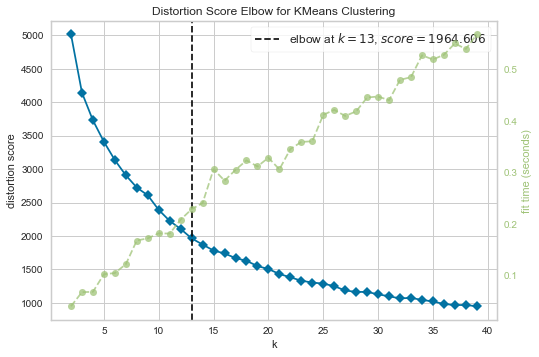

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
# # 파란선은 그룹의 변동성을 확인하는 지표 
# # 세로 점선으로 최적의 군집 개수
# # 녹색 점선은 군집을 학습할 때 걸린 시간이
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,40))
visualizer.fit(cluster_4)
visualizer.show()

In [43]:
from sklearn.metrics import silhouette_score

k_range = range(2,40)

best_n = -1
best_silhouette_score = -1

for k in k_range:
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_4)
    clusters = kmeans.predict(cluster_4)
    
    score = silhouette_score(cluster_4,clusters)
    print('k :', k,'score :', score)
    
    if score > best_silhouette_score:
        best_n = k
        best_silhouette_score= score
print('best n:', best_n, 'best score :', best_silhouette_score)        

k : 2 score : 0.3422286095114445
k : 3 score : 0.3418296624308733
k : 4 score : 0.3644945512446908
k : 5 score : 0.3901798075118992
k : 6 score : 0.26479293956922506
k : 7 score : 0.2899439167172463
k : 8 score : 0.3038609596846085
k : 9 score : 0.27776001530952377
k : 10 score : 0.30148632721658536
k : 11 score : 0.3152924399237836
k : 12 score : 0.29424861082724424
k : 13 score : 0.2885133876464678
k : 14 score : 0.3085716295321497
k : 15 score : 0.32145446088801066
k : 16 score : 0.300480203546371
k : 17 score : 0.2939563971788754
k : 18 score : 0.3140486528922848
k : 19 score : 0.2970525959802185
k : 20 score : 0.3017658352294421
k : 21 score : 0.31910598326789064
k : 22 score : 0.3127965126956512
k : 23 score : 0.2984251696021162
k : 24 score : 0.3109585891625971
k : 25 score : 0.3109974708603941
k : 26 score : 0.3072614149798705
k : 27 score : 0.31424871067755333
k : 28 score : 0.3050305359515117
k : 29 score : 0.30426002923058915
k : 30 score : 0.2928211723852362
k : 31 score : 

13 개로 군집화
label  cluster
0      0          749
       1          231
       2          465
       3          303
       4          784
       5          354
       6          119
       7          184
       8          545
       9          312
       10         144
       11         129
       12         108
1      0           34
       1           12
       2            9
       3           19
       4           19
       5           23
       6            5
       7            6
       8           23
       9           18
       10          11
       11          26
       12           4
Name: AGE, dtype: int64

0 번째 군집 중도탈락 비율 : 4.34 %
1 번째 군집 중도탈락 비율 : 4.94 %
2 번째 군집 중도탈락 비율 : 1.9 %
3 번째 군집 중도탈락 비율 : 5.9 %
4 번째 군집 중도탈락 비율 : 2.37 %
5 번째 군집 중도탈락 비율 : 6.1 %
6 번째 군집 중도탈락 비율 : 4.03 %
7 번째 군집 중도탈락 비율 : 3.16 %
8 번째 군집 중도탈락 비율 : 4.05 %
9 번째 군집 중도탈락 비율 : 5.45 %
10 번째 군집 중도탈락 비율 : 7.1 %
11 번째 군집 중도탈락 비율 : 16.77 %
12 번째 군집 중도탈락 비율 : 3.57 %

13 개로 군집화
(4636, 2)
설명력 :  0.9191617324074116


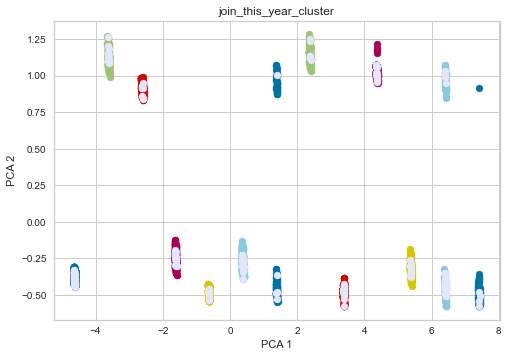

In [44]:
label_data = y_train.copy()
cluster_4_copy = cluster_4.copy()

cluster_num = 13

km = KMeans(n_clusters=cluster_num ,init='k-means++', random_state=42)
km.fit(cluster_4_copy)

label_data = label_data.replace('유지',0)
label_data = label_data.replace('탈락',1)

cluster_4_copy['label'] = label_data

cluster_4_copy['cluster'] = km.labels_

cluster_result = cluster_4_copy.groupby(['label','cluster'])['AGE'].count()
print(cluster_num,"개로 군집화")
print(cluster_result) # groupby로 정답 분포 확인
print()

if len(cluster_result[1]) >= len(cluster_result[0]):
    length = cluster_result[0].index
else:    
    length = cluster_result[1].index
    
for j in length:
    print(j,"번째 군집 중도탈락 비율 : ",end="")
    p_100(cluster_result[1][j],cluster_result[0][j])

# 차원축소
pca = PCA(n_components=2)
pca.fit(cluster_4_copy)
data_pca = pca.transform(cluster_4_copy)

print()
print(cluster_num,"개로 군집화")
print(data_pca.shape)
print("설명력 : ",sum(pca.explained_variance_ratio_))

cluster_4_copy['pca_x'] = data_pca[:,0]
cluster_4_copy['pca_y'] = data_pca[:,1]

arr = [0 for n in range(cluster_num+1)]

for j in range(0,cluster_num):
    arr[j] = cluster_4_copy.loc[cluster_4_copy['cluster'] == j].index

arr[cluster_num] = cluster_4_copy.loc[cluster_4_copy['label'] == 1].index   

for j in range(0,len(arr)-1):
    plt.scatter(x=cluster_4_copy.loc[arr[j],'pca_x'], y=cluster_4_copy.loc[arr[j],'pca_y'])

plt.scatter(x=cluster_4_copy.loc[arr[len(arr)-1],'pca_x'], y=cluster_4_copy.loc[arr[len(arr)-1],'pca_y'], color='lavender')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
globals()['{}__cluster'.format(i)] = "{}_cluster".format(i)
plt.title(globals()['{}__cluster'.format(i)])
plt.show()

In [45]:
list_4 = [2,4]

cluster_4_copy_N = extraction_func(cluster_4_copy,'cluster',list_4)

cluster_4_copy_N

,AGE,ATTENDANCE,GRADE,INCOME_QUINTILE,PREPARE_ATTENDANCE,PREPARE_GRADE,PREPARE_join_1years_ago,PREPARE_join_2years_ago,PREPARE_join_3years_ago,PREPARE_join_4years_ago,...,off_3years_ago_N,off_3years_ago_Y,off_4years_ago_N,off_4years_ago_Y,off_this_year_N,off_this_year_Y,label,cluster,pca_x,pca_y
2497,0.000000,0.333333,0.4,0.25,0.307491,0.485003,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,0,1,0,2,-2.616705,0.918652
2522,0.000000,0.333333,0.0,0.75,0.307491,0.141672,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,0,1,0,2,-2.637782,0.968889
19715,0.000000,0.333333,0.6,1.00,0.307491,0.656669,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,0,1,0,2,-2.616896,0.942294
17194,0.166667,0.333333,0.8,0.50,0.293692,0.795891,0.036554,0.028862,0.048759,0.035663,...,1,0,1,0,0,1,0,2,-2.601620,0.905134
15451,0.000000,0.333333,0.2,0.75,0.307491,0.313337,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,0,1,0,2,-2.629871,0.955766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19115,0.000000,0.333333,0.2,0.25,0.307491,0.313337,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,1,0,0,4,-0.633317,-0.467564
15265,0.000000,0.000000,0.4,0.25,0.013799,0.485003,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,1,0,0,4,-0.624677,-0.530999
16216,0.000000,0.000000,0.4,0.25,0.013799,0.485003,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,1,0,0,4,-0.624693,-0.531094
20227,0.000000,0.000000,0.4,0.50,0.013799,0.485003,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,1,0,0,4,-0.627362,-0.518925


In [46]:
list_4 = [11]

cluster_4_copy_Y = extraction_func(cluster_4_copy,'cluster',list_4)

cluster_4_copy_Y

,AGE,ATTENDANCE,GRADE,INCOME_QUINTILE,PREPARE_ATTENDANCE,PREPARE_GRADE,PREPARE_join_1years_ago,PREPARE_join_2years_ago,PREPARE_join_3years_ago,PREPARE_join_4years_ago,...,off_3years_ago_N,off_3years_ago_Y,off_4years_ago_N,off_4years_ago_Y,off_this_year_N,off_this_year_Y,label,cluster,pca_x,pca_y
8256,0.000000,0.333333,0.6,1.00,0.307491,0.656669,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,1,0,0,11,6.401591,-0.465172
14483,0.000000,1.000000,0.8,0.75,0.894875,0.828334,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,0,1,0,11,6.416959,1.008738
11351,0.000000,0.333333,0.8,0.75,0.307491,0.828334,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,0,1,0,11,6.418403,0.906656
5548,0.000000,0.666667,0.6,0.25,0.601183,0.656669,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,1,0,0,11,6.408825,-0.450792
927,0.166667,0.333333,0.8,0.50,0.293692,0.795891,0.008099,0.028862,0.048759,0.035663,...,1,0,1,0,0,1,0,11,6.423234,0.894402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1409,0.000000,1.000000,0.0,1.00,0.894875,0.141672,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,1,0,0,11,6.376501,-0.325423
9874,0.000000,0.333333,0.8,1.00,0.307491,0.828334,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,1,0,0,11,6.409434,-0.477864
14486,0.000000,0.666667,0.8,1.00,0.601183,0.828334,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,1,0,1,11,6.411816,-0.431444
9762,0.000000,0.666667,1.0,1.00,0.601183,1.000000,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,0,1,1,11,6.425944,0.952458


## 추출한 데이터 합치기

In [47]:
print(len(cluster_0_copy_N))
print(len(cluster_0_copy_Y))
print(len(cluster_1_copy_Y))
print(len(cluster_1_copy_N))
print(len(cluster_2_copy_N))
print(len(cluster_2_copy_Y))
print(len(cluster_3_copy_Y))
print(len(cluster_3_copy_N))
print(len(cluster_4_copy_Y))
print(len(cluster_4_copy_N))

906
57
1092
165
1643
75
150
790
155
1277


In [48]:
N_data_feature = pd.concat([ cluster_0_copy_N,cluster_1_copy_N,cluster_2_copy_N,cluster_3_copy_N,cluster_4_copy_N], axis=0).iloc[:,:38]
Y_data_feature = pd.concat([ cluster_0_copy_Y,cluster_1_copy_Y,cluster_2_copy_Y,cluster_3_copy_Y,cluster_4_copy_Y], axis=0).iloc[:,:38]

y_train_copy = y_train.copy()

N_data_label = y_train_copy[N_data_feature.index]
Y_data_label = y_train_copy[Y_data_feature.index]

data_feature = pd.concat([N_data_feature,Y_data_feature],axis=0)
data_label = pd.concat([N_data_label,Y_data_label],axis=0)

In [49]:
print(len(data_feature))

print(len(Y_data_label.to_frame().loc[Y_data_label.to_frame()['ACADEMIC_STAT_CODE'] == '탈락']))
print(len(Y_data_label.to_frame().loc[Y_data_label.to_frame()['ACADEMIC_STAT_CODE'] == '유지']))

print(len(N_data_label.to_frame().loc[N_data_label.to_frame()['ACADEMIC_STAT_CODE'] == '탈락']))
print(len(N_data_label.to_frame().loc[N_data_label.to_frame()['ACADEMIC_STAT_CODE'] == '유지']))

6310
177
1352
86
4695


## 남은 데이터로 1차 재 군집화

In [50]:
x_train_copy = x_train.copy()
x_train_copy.drop(data_feature.index, inplace=True)

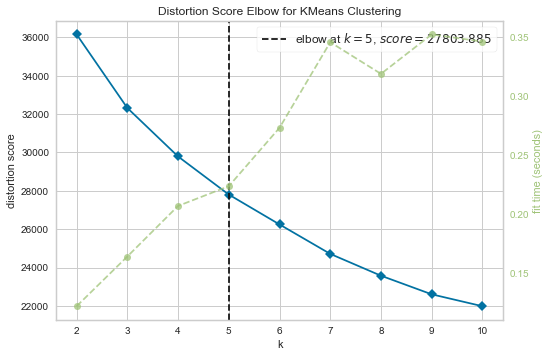

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [51]:
# # 파란선은 그룹의 변동성을 확인하는 지표 
# # 세로 점선으로 최적의 군집 개수
# # 녹색 점선은 군집을 학습할 때 걸린 시간이
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,11))
visualizer.fit(x_train_copy)
visualizer.show()

In [52]:
from sklearn.metrics import silhouette_score

k_range = range(2,11)

best_n = -1
best_silhouette_score = -1

for k in k_range:
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_train_copy)
    clusters = kmeans.predict(x_train_copy)
    
    score = silhouette_score(x_train_copy,clusters)
    print('k :', k,'score :', score)
    
    if score > best_silhouette_score:
        best_n = k
        best_silhouette_score= score
print('best n:', best_n, 'best score :', best_silhouette_score)        

k : 2 score : 0.17634664686002532
k : 3 score : 0.1873297430338865
k : 4 score : 0.1918969625770579
k : 5 score : 0.17840431683392038
k : 6 score : 0.18831810217397066
k : 7 score : 0.19304472569748007
k : 8 score : 0.1967090134332078
k : 9 score : 0.20751083343081222
k : 10 score : 0.20804881310704693
best n: 10 best score : 0.20804881310704693


3 개로 군집화
label  cluster
0      0          3471
       1          3521
       2          3688
1      0           154
       1           188
       2           183
Name: AGE, dtype: int64

0 번째 군집 중도탈락 비율 : 4.25 %
1 번째 군집 중도탈락 비율 : 5.07 %
2 번째 군집 중도탈락 비율 : 4.73 %

3 개로 군집화
(11205, 2)
설명력 :  0.4252809661647292


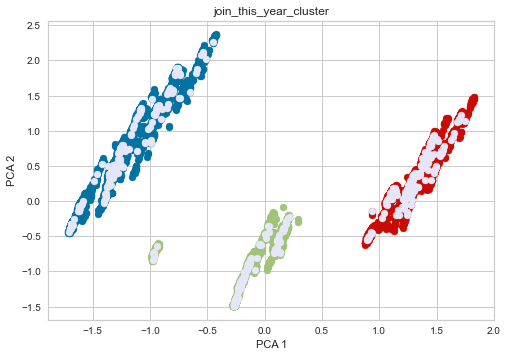

In [53]:
label_data = y_train.copy()
x_train_copy = x_train.copy()
x_train_copy.drop(data_feature.index, inplace=True)

cluster_num = 3

km = KMeans(n_clusters=cluster_num ,init='k-means++', random_state=42)
km.fit(x_train_copy)

label_data = label_data.replace('유지',0)
label_data = label_data.replace('탈락',1)

x_train_copy['label'] = label_data

x_train_copy['cluster'] = km.labels_

cluster_result = x_train_copy.groupby(['label','cluster'])['AGE'].count()
print(cluster_num,"개로 군집화")
print(cluster_result) # groupby로 정답 분포 확인
print()

if len(cluster_result[1]) >= len(cluster_result[0]):
    length = cluster_result[0].index
else:    
    length = cluster_result[1].index
    
for j in length:
    print(j,"번째 군집 중도탈락 비율 : ",end="")
    p_100(cluster_result[1][j],cluster_result[0][j])

# 차원축소
pca = PCA(n_components=2)
pca.fit(x_train_copy)
data_pca = pca.transform(x_train_copy)

print()
print(cluster_num,"개로 군집화")
print(data_pca.shape)
print("설명력 : ",sum(pca.explained_variance_ratio_))

x_train_copy['pca_x'] = data_pca[:,0]
x_train_copy['pca_y'] = data_pca[:,1]

arr = [0 for n in range(cluster_num+1)]

for j in range(0,cluster_num):
    arr[j] = x_train_copy.loc[x_train_copy['cluster'] == j].index

arr[cluster_num] = x_train_copy.loc[x_train_copy['label'] == 1].index   

for j in range(0,len(arr)-1):
    plt.scatter(x=x_train_copy.loc[arr[j],'pca_x'], y=x_train_copy.loc[arr[j],'pca_y'])

plt.scatter(x=x_train_copy.loc[arr[len(arr)-1],'pca_x'], y=x_train_copy.loc[arr[len(arr)-1],'pca_y'], color='lavender')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
globals()['{}__cluster'.format(i)] = "{}_cluster".format(i)
plt.title(globals()['{}__cluster'.format(i)])
plt.show()

#### 2차 재 군집
 - 1차 재 군집 결과 목표하던 수치를 가진 집단이 없으므로 2차 재 군집 진행

In [54]:
cluster2_0 = x_train_copy.loc[x_train_copy['cluster'] == 0].drop(['label','cluster','pca_x','pca_y'], axis=1)
cluster2_1 = x_train_copy.loc[x_train_copy['cluster'] == 1].drop(['label','cluster','pca_x','pca_y'], axis=1)
cluster2_2 = x_train_copy.loc[x_train_copy['cluster'] == 2].drop(['label','cluster','pca_x','pca_y'], axis=1)

##### 2차 재 군집
 - 0번

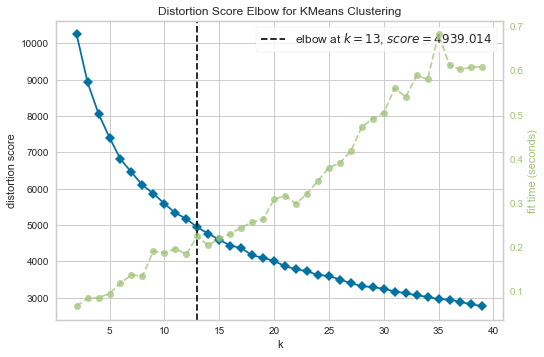

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [55]:
# # 파란선은 그룹의 변동성을 확인하는 지표 
# # 세로 점선으로 최적의 군집 개수
# # 녹색 점선은 군집을 학습할 때 걸린 시간이
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,40))
visualizer.fit(cluster2_0)
visualizer.show()

In [56]:
from sklearn.metrics import silhouette_score

k_range = range(2,40)

best_n = -1
best_silhouette_score = -1

for k in k_range:
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster2_0)
    clusters = kmeans.predict(cluster2_0)
    
    score = silhouette_score(cluster2_0,clusters)
    print('k :', k,'score :', score)
    
    if score > best_silhouette_score:
        best_n = k
        best_silhouette_score= score
print('best n:', best_n, 'best score :', best_silhouette_score)        

k : 2 score : 0.18753467061929535
k : 3 score : 0.17325162556855503
k : 4 score : 0.1741057879555007
k : 5 score : 0.1836358574715795
k : 6 score : 0.20916288812662462
k : 7 score : 0.21708534169396065
k : 8 score : 0.22222999210659306
k : 9 score : 0.2313138759644945
k : 10 score : 0.21984474570437124
k : 11 score : 0.24446251636196584
k : 12 score : 0.22137420191103435
k : 13 score : 0.23647360429273637
k : 14 score : 0.24530518555063896
k : 15 score : 0.2534350356697535
k : 16 score : 0.2672813864308461
k : 17 score : 0.26766057613350447
k : 18 score : 0.27883032046685735
k : 19 score : 0.28245737621185757
k : 20 score : 0.2841881493421653
k : 21 score : 0.2860170140377782
k : 22 score : 0.2975708436467487
k : 23 score : 0.2648540638948665
k : 24 score : 0.30973588401657465
k : 25 score : 0.28390741037873374
k : 26 score : 0.31972798359930965
k : 27 score : 0.2913700731433476
k : 28 score : 0.32313835011545455
k : 29 score : 0.2934181427000762
k : 30 score : 0.2886942674216589
k : 3

28 개로 군집화
label  cluster
0      0           70
       1          131
       2          202
       3          376
       4           66
       5          133
       6           81
       7          115
       8          370
       9          140
       10          57
       11         185
       12         135
       13          91
       14         183
       15          79
       16          90
       17          93
       18         139
       19         154
       20          54
       21          66
       22          79
       23         105
       24          54
       25          65
       26          78
       27          80
1      0            2
       1            4
       2           13
       3           12
       4            5
       5            6
       6            3
       7            7
       8           15
       9            7
       10           3
       11           5
       12           6
       13           4
       14          11
       15           5
       

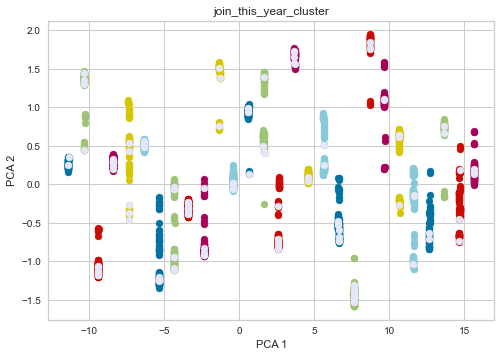

In [57]:
label_data = y_train.copy()

cluster_num = 28

km = KMeans(n_clusters=cluster_num ,init='k-means++', random_state=42)
km.fit(cluster2_0)

label_data = label_data.replace('유지',0)
label_data = label_data.replace('탈락',1)

cluster2_0['label'] = label_data

cluster2_0['cluster'] = km.labels_

cluster_result = cluster2_0.groupby(['label','cluster'])['AGE'].count()
print(cluster_num,"개로 군집화")
print(cluster_result) # groupby로 정답 분포 확인
print()

if len(cluster_result[1]) >= len(cluster_result[0]):
    length = cluster_result[0].index
else:    
    length = cluster_result[1].index
    
for j in length:
    print(j,"번째 군집 중도탈락 비율 : ",end="")
    p_100(cluster_result[1][j],cluster_result[0][j])

# 차원축소
pca = PCA(n_components=2)
pca.fit(cluster2_0)
data_pca = pca.transform(cluster2_0)

print()
print(cluster_num,"개로 군집화")
print(data_pca.shape)
print("설명력 : ",sum(pca.explained_variance_ratio_))

cluster2_0['pca_x'] = data_pca[:,0]
cluster2_0['pca_y'] = data_pca[:,1]

arr = [0 for n in range(cluster_num+1)]

for j in range(0,cluster_num):
    arr[j] = cluster2_0.loc[cluster2_0['cluster'] == j].index

arr[cluster_num] = cluster2_0.loc[cluster2_0['label'] == 1].index   

for j in range(0,len(arr)-1):
    plt.scatter(x=cluster2_0.loc[arr[j],'pca_x'], y=cluster2_0.loc[arr[j],'pca_y'])

plt.scatter(x=cluster2_0.loc[arr[len(arr)-1],'pca_x'], y=cluster2_0.loc[arr[len(arr)-1],'pca_y'], color='lavender')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
globals()['{}__cluster'.format(i)] = "{}_cluster".format(i)
plt.title(globals()['{}__cluster'.format(i)])
plt.show()

In [58]:
list_0 = [4,21,25]

cluster2_0_N = extraction_func(cluster2_0,'cluster',list_4)

cluster2_0_N

,AGE,ATTENDANCE,GRADE,INCOME_QUINTILE,PREPARE_ATTENDANCE,PREPARE_GRADE,PREPARE_join_1years_ago,PREPARE_join_2years_ago,PREPARE_join_3years_ago,PREPARE_join_4years_ago,...,off_3years_ago_N,off_3years_ago_Y,off_4years_ago_N,off_4years_ago_Y,off_this_year_N,off_this_year_Y,label,cluster,pca_x,pca_y
12445,0.333333,0.333333,0.4,0.25,0.330354,0.424067,0.004073,0.003817,0.048759,0.035663,...,1,0,1,0,1,0,0,11,-0.380348,0.029990
8725,0.333333,0.000000,0.2,0.25,0.036662,0.252401,0.174804,0.094682,0.048759,0.035663,...,1,0,1,0,1,0,0,11,-0.376687,-0.042884
10162,0.166667,1.000000,0.2,0.50,0.881075,0.280894,0.008099,0.028862,0.048759,0.035663,...,1,0,1,0,1,0,0,11,-0.377122,-0.049497
18286,0.333333,0.333333,0.0,1.00,0.330354,0.080735,0.032528,0.003817,0.048759,0.035663,...,1,0,1,0,1,0,0,11,-0.378148,-0.018538
339,0.833333,0.333333,0.4,0.50,0.375161,0.361575,0.012557,0.003199,0.066240,0.001345,...,1,0,1,0,1,0,0,11,-0.373175,0.049677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7114,0.833333,0.666667,0.8,0.50,0.668853,0.704906,0.012557,0.116779,0.004687,0.001345,...,1,0,1,0,1,0,0,11,-0.369985,0.085701
16921,1.000000,0.666667,0.8,0.50,0.706308,0.686663,0.023877,0.013033,0.045922,0.000000,...,1,0,1,0,1,0,0,11,-0.374646,0.168843
15586,0.666667,0.333333,0.2,0.25,0.354777,0.206796,0.004773,0.000000,0.000000,0.042859,...,1,0,1,0,1,0,0,11,-0.375394,-0.005130
13986,0.333333,0.333333,0.4,0.75,0.330354,0.424067,0.004073,0.049249,0.048759,0.035663,...,1,0,1,0,1,0,0,11,-0.375027,-0.000447


##### 2차 재 군집
 - 1번

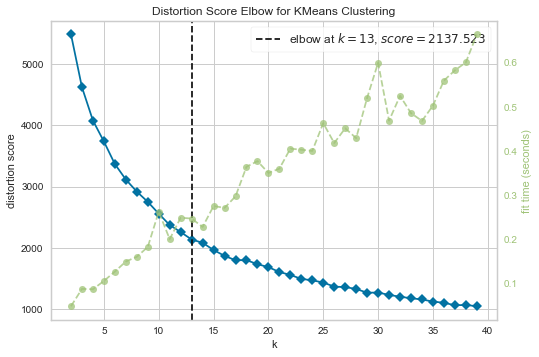

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [59]:
# # 파란선은 그룹의 변동성을 확인하는 지표 
# # 세로 점선으로 최적의 군집 개수
# # 녹색 점선은 군집을 학습할 때 걸린 시간이
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,40))
visualizer.fit(cluster2_1)
visualizer.show()

In [60]:
from sklearn.metrics import silhouette_score

k_range = range(2,40)

best_n = -1
best_silhouette_score = -1

for k in k_range:
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster2_1)
    clusters = kmeans.predict(cluster2_1)
    
    score = silhouette_score(cluster2_1,clusters)
    print('k :', k,'score :', score)
    
    if score > best_silhouette_score:
        best_n = k
        best_silhouette_score= score
print('best n:', best_n, 'best score :', best_silhouette_score)        

k : 2 score : 0.3079450225984044
k : 3 score : 0.2800102345725671
k : 4 score : 0.307098347122192
k : 5 score : 0.32461825067146793
k : 6 score : 0.35765069752927364
k : 7 score : 0.37181020259876746
k : 8 score : 0.2801628351214136
k : 9 score : 0.28137737071173424
k : 10 score : 0.29995548226111124
k : 11 score : 0.3134692960890117
k : 12 score : 0.32949080161663813
k : 13 score : 0.338056325944534
k : 14 score : 0.44408807734066374
k : 15 score : 0.3520592387145678
k : 16 score : 0.34657657743659703
k : 17 score : 0.3595673337550325
k : 18 score : 0.3155067220068417
k : 19 score : 0.34016494318422713
k : 20 score : 0.34555567563830314
k : 21 score : 0.34976384131035126
k : 22 score : 0.33361635752331664
k : 23 score : 0.3607740234389486
k : 24 score : 0.33987135102548094
k : 25 score : 0.3389617241960199
k : 26 score : 0.3707565831205211
k : 27 score : 0.3592370444430334
k : 28 score : 0.33060976525657626
k : 29 score : 0.32433455969898906
k : 30 score : 0.32739045972745284
k : 31 s

13 개로 군집화
label  cluster
0      0          387
       1          846
       2          147
       3          197
       4          119
       5          333
       6          474
       7          196
       8          118
       9          334
       10         158
       11          94
       12         118
1      0           19
       1           35
       2           12
       3           10
       4            5
       5           18
       6           24
       7            6
       8            8
       9           21
       10          12
       11           4
       12          14
Name: AGE, dtype: int64

0 번째 군집 중도탈락 비율 : 4.68 %
1 번째 군집 중도탈락 비율 : 3.97 %
2 번째 군집 중도탈락 비율 : 7.55 %
3 번째 군집 중도탈락 비율 : 4.83 %
4 번째 군집 중도탈락 비율 : 4.03 %
5 번째 군집 중도탈락 비율 : 5.13 %
6 번째 군집 중도탈락 비율 : 4.82 %
7 번째 군집 중도탈락 비율 : 2.97 %
8 번째 군집 중도탈락 비율 : 6.35 %
9 번째 군집 중도탈락 비율 : 5.92 %
10 번째 군집 중도탈락 비율 : 7.06 %
11 번째 군집 중도탈락 비율 : 4.08 %
12 번째 군집 중도탈락 비율 : 10.61 %

13 개로 군집화
(3709, 2)
설명력 :  0.9064916169786598


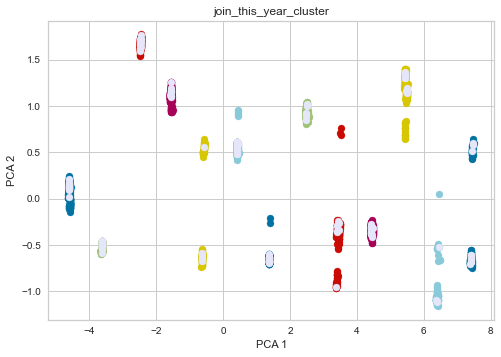

In [61]:
label_data = y_train.copy()

cluster_num = 13

km = KMeans(n_clusters=cluster_num ,init='k-means++', random_state=42)
km.fit(cluster2_1)

label_data = label_data.replace('유지',0)
label_data = label_data.replace('탈락',1)

cluster2_1['label'] = label_data

cluster2_1['cluster'] = km.labels_

cluster_result = cluster2_1.groupby(['label','cluster'])['AGE'].count()
print(cluster_num,"개로 군집화")
print(cluster_result) # groupby로 정답 분포 확인
print()

if len(cluster_result[1]) >= len(cluster_result[0]):
    length = cluster_result[0].index
else:    
    length = cluster_result[1].index
    
for j in length:
    print(j,"번째 군집 중도탈락 비율 : ",end="")
    p_100(cluster_result[1][j],cluster_result[0][j])

# 차원축소
pca = PCA(n_components=2)
pca.fit(cluster2_1)
data_pca = pca.transform(cluster2_1)

print()
print(cluster_num,"개로 군집화")
print(data_pca.shape)
print("설명력 : ",sum(pca.explained_variance_ratio_))

cluster2_1['pca_x'] = data_pca[:,0]
cluster2_1['pca_y'] = data_pca[:,1]

arr = [0 for n in range(cluster_num+1)]

for j in range(0,cluster_num):
    arr[j] = cluster2_1.loc[cluster2_1['cluster'] == j].index

arr[cluster_num] = cluster2_1.loc[cluster2_1['label'] == 1].index   

for j in range(0,len(arr)-1):
    plt.scatter(x=cluster2_1.loc[arr[j],'pca_x'], y=cluster2_1.loc[arr[j],'pca_y'])

plt.scatter(x=cluster2_1.loc[arr[len(arr)-1],'pca_x'], y=cluster2_1.loc[arr[len(arr)-1],'pca_y'], color='lavender')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
globals()['{}__cluster'.format(i)] = "{}_cluster".format(i)
plt.title(globals()['{}__cluster'.format(i)])
plt.show()

In [62]:
list_1 = [3]

cluster2_1_Y = extraction_func(cluster2_1,'cluster',list_1)

cluster2_1_Y

,AGE,ATTENDANCE,GRADE,INCOME_QUINTILE,PREPARE_ATTENDANCE,PREPARE_GRADE,PREPARE_join_1years_ago,PREPARE_join_2years_ago,PREPARE_join_3years_ago,PREPARE_join_4years_ago,...,off_3years_ago_N,off_3years_ago_Y,off_4years_ago_N,off_4years_ago_Y,off_this_year_N,off_this_year_Y,label,cluster,pca_x,pca_y
19781,0.166667,0.333333,0.8,0.25,0.293692,0.795891,0.008099,0.028862,0.048759,0.035663,...,1,0,1,0,0,1,0,3,-1.573927,1.098197
19952,0.166667,0.666667,0.6,0.75,0.587383,0.624225,0.008099,0.028862,0.048759,0.035663,...,1,0,1,0,0,1,0,3,-1.568610,1.152653
2498,0.000000,0.333333,0.0,1.00,0.307491,0.141672,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,0,1,0,3,-1.572695,1.175884
18522,0.166667,0.666667,0.6,0.25,0.587383,0.624225,0.008099,0.028862,0.048759,0.035663,...,1,0,1,0,0,1,0,3,-1.541745,0.996461
1038,0.000000,0.666667,0.8,1.00,0.601183,0.828334,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,0,1,0,3,-1.577052,1.121222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5644,0.000000,0.333333,0.4,0.75,0.307491,0.485003,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,0,1,0,3,-1.576101,1.134480
17019,0.166667,0.333333,0.2,0.50,0.293692,0.280894,0.008099,0.028862,0.048759,0.035663,...,1,0,1,0,0,1,0,3,-1.567795,1.165907
20080,0.000000,0.333333,0.6,1.00,0.307491,0.656669,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,0,1,0,3,-1.580470,1.107021
20147,0.333333,0.000000,0.4,0.25,0.036662,0.424067,0.089438,0.071965,0.048759,0.035663,...,1,0,1,0,0,1,0,3,-1.569485,1.115414


##### 2차 재 군집
 - 2번

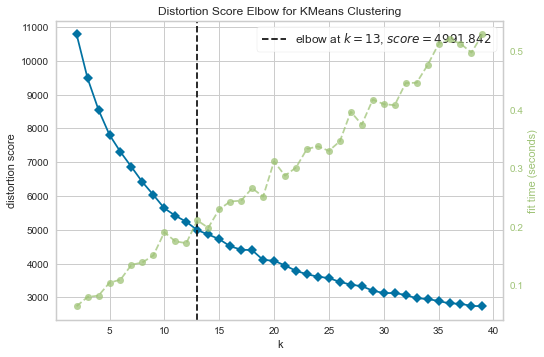

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [63]:
# # 파란선은 그룹의 변동성을 확인하는 지표 
# # 세로 점선으로 최적의 군집 개수
# # 녹색 점선은 군집을 학습할 때 걸린 시간이
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,40))
visualizer.fit(cluster2_2)
visualizer.show()

In [64]:
from sklearn.metrics import silhouette_score

k_range = range(2,40)

best_n = -1
best_silhouette_score = -1

for k in k_range:
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster2_2)
    clusters = kmeans.predict(cluster2_2)
    
    score = silhouette_score(cluster2_2,clusters)
    print('k :', k,'score :', score)
    
    if score > best_silhouette_score:
        best_n = k
        best_silhouette_score= score
print('best n:', best_n, 'best score :', best_silhouette_score)        

k : 2 score : 0.18292802891934307
k : 3 score : 0.18146022473921442
k : 4 score : 0.1699526477151442
k : 5 score : 0.20299087128033086
k : 6 score : 0.2103753052457051
k : 7 score : 0.20985956182800386
k : 8 score : 0.2252773316289319
k : 9 score : 0.2318601668009685
k : 10 score : 0.24425379756308357
k : 11 score : 0.25572048176831697
k : 12 score : 0.26262809863912806
k : 13 score : 0.2738622795341339
k : 14 score : 0.2710342345699325
k : 15 score : 0.2704489326025708
k : 16 score : 0.27418601855000213
k : 17 score : 0.2796433481218919
k : 18 score : 0.2782909785877768
k : 19 score : 0.2866851549665456
k : 20 score : 0.2937485138808895
k : 21 score : 0.2964360185239423
k : 22 score : 0.3042880690594784
k : 23 score : 0.3108088476116277
k : 24 score : 0.31545098846829567
k : 25 score : 0.3150796159468976
k : 26 score : 0.2944353058568233
k : 27 score : 0.3336970382045515
k : 28 score : 0.3178827999635151
k : 29 score : 0.3461900015013873
k : 30 score : 0.34945224978867906
k : 31 score

30 개로 군집화
label  cluster
0      0          243
       1          196
       2          275
       3           77
       4          155
       5           75
       6          350
       7          168
       8          138
       9          106
       10         108
       11         107
       12          86
       13         149
       14          57
       15          98
       16          58
       17         142
       18         149
       19         156
       20         112
       21          95
       22         112
       23          62
       24          73
       25          66
       26         110
       27          46
       28          41
       29          78
1      0            8
       1           14
       2           15
       3            5
       4            4
       5            4
       6           21
       7            4
       8            7
       9            4
       10           7
       11           5
       12           6
       13           6
       

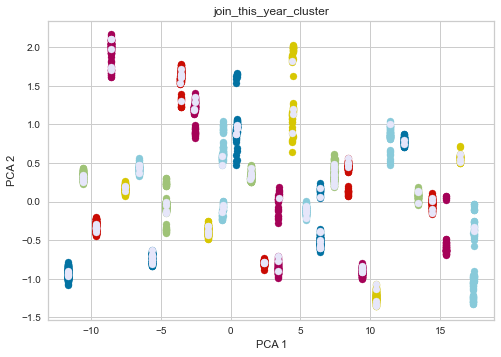

In [65]:
label_data = y_train.copy()

cluster_num = 30

km = KMeans(n_clusters=cluster_num ,init='k-means++', random_state=42)
km.fit(cluster2_2)

label_data = label_data.replace('유지',0)
label_data = label_data.replace('탈락',1)

cluster2_2['label'] = label_data

cluster2_2['cluster'] = km.labels_

cluster_result = cluster2_2.groupby(['label','cluster'])['AGE'].count()
print(cluster_num,"개로 군집화")
print(cluster_result) # groupby로 정답 분포 확인
print()

if len(cluster_result[1]) >= len(cluster_result[0]):
    length = cluster_result[0].index
else:    
    length = cluster_result[1].index
    
for j in length:
    print(j,"번째 군집 중도탈락 비율 : ",end="")
    p_100(cluster_result[1][j],cluster_result[0][j])

# 차원축소
pca = PCA(n_components=2)
pca.fit(cluster2_2)
data_pca = pca.transform(cluster2_2)

print()
print(cluster_num,"개로 군집화")
print(data_pca.shape)
print("설명력 : ",sum(pca.explained_variance_ratio_))

cluster2_2['pca_x'] = data_pca[:,0]
cluster2_2['pca_y'] = data_pca[:,1]

arr = [0 for n in range(cluster_num+1)]

for j in range(0,cluster_num):
    arr[j] = cluster2_2.loc[cluster2_2['cluster'] == j].index

arr[cluster_num] = cluster2_2.loc[cluster2_2['label'] == 1].index   

for j in range(0,len(arr)-1):
    plt.scatter(x=cluster2_2.loc[arr[j],'pca_x'], y=cluster2_2.loc[arr[j],'pca_y'])

plt.scatter(x=cluster2_2.loc[arr[len(arr)-1],'pca_x'], y=cluster2_2.loc[arr[len(arr)-1],'pca_y'], color='lavender')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
globals()['{}__cluster'.format(i)] = "{}_cluster".format(i)
plt.title(globals()['{}__cluster'.format(i)])
plt.show()

In [66]:
list_2 = [6,7,9,10]

cluster2_2_N = extraction_func(cluster2_2,'cluster',list_2)

cluster2_2_N

,AGE,ATTENDANCE,GRADE,INCOME_QUINTILE,PREPARE_ATTENDANCE,PREPARE_GRADE,PREPARE_join_1years_ago,PREPARE_join_2years_ago,PREPARE_join_3years_ago,PREPARE_join_4years_ago,...,off_3years_ago_N,off_3years_ago_Y,off_4years_ago_N,off_4years_ago_Y,off_this_year_N,off_this_year_Y,label,cluster,pca_x,pca_y
9579,0.333333,0.000000,0.6,0.75,0.036662,0.595733,0.004073,0.071965,0.048759,0.035663,...,1,0,1,0,1,0,0,6,-5.630041,-0.699107
2298,0.333333,0.000000,0.4,0.50,0.036662,0.424067,0.004073,0.003817,0.048759,0.035663,...,1,0,1,0,1,0,0,6,-5.630517,-0.722715
11423,0.166667,0.666667,0.6,0.50,0.587383,0.624225,0.008099,0.028862,0.048759,0.035663,...,1,0,1,0,1,0,0,6,-5.629605,-0.750973
12487,0.333333,0.000000,0.6,0.75,0.036662,0.595733,0.004073,0.003817,0.048759,0.035663,...,1,0,1,0,1,0,0,6,-5.630041,-0.700210
11335,0.166667,0.333333,0.6,0.75,0.293692,0.624225,0.065009,0.028862,0.048759,0.035663,...,1,0,1,0,1,0,0,6,-5.630221,-0.736954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6102,1.000000,0.333333,0.2,0.25,0.412617,0.171666,0.023877,0.013033,0.015146,0.021270,...,1,0,1,0,1,0,0,10,-1.609939,-0.340114
9146,0.666667,0.666667,0.0,0.75,0.648469,0.035131,0.004773,0.022716,0.000000,0.000319,...,1,0,1,0,1,0,0,10,-1.611566,-0.428264
202,1.000000,0.333333,1.0,0.50,0.412617,0.858328,0.023877,0.013033,0.015146,0.021270,...,1,0,1,0,1,0,0,10,-1.607919,-0.252405
854,0.333333,0.000000,0.4,0.25,0.036662,0.424067,0.004073,0.003817,0.048759,0.035663,...,1,0,1,0,1,0,0,10,-1.613154,-0.410355


## 추출한 데이터 합치기

In [67]:
print(len(cluster2_0_N))
print(len(cluster2_1_Y))
print(len(cluster2_2_N))

190
207
768


In [68]:
N_data_feature_2 = pd.concat([ cluster2_0_N,cluster2_2_N ], axis=0).iloc[:,:38]
Y_data_feature_2 = cluster2_1_Y.iloc[:,:38]

y_train_copy = y_train.copy()

N_data_label_2 = y_train_copy[N_data_feature_2.index]
Y_data_label_2 = y_train_copy[Y_data_feature_2.index]

data_feature_2 = pd.concat([N_data_feature_2,Y_data_feature_2],axis=0)
data_label_2 = pd.concat([N_data_label_2,Y_data_label_2],axis=0)

In [69]:
print(len(data_feature_2))

print(len(Y_data_label_2.to_frame().loc[Y_data_label_2.to_frame()['ACADEMIC_STAT_CODE'] == '탈락']))
print(len(Y_data_label_2.to_frame().loc[Y_data_label_2.to_frame()['ACADEMIC_STAT_CODE'] == '유지']))

print(len(N_data_label_2.to_frame().loc[N_data_label_2.to_frame()['ACADEMIC_STAT_CODE'] == '탈락']))
print(len(N_data_label_2.to_frame().loc[N_data_label_2.to_frame()['ACADEMIC_STAT_CODE'] == '유지']))

1165
10
197
41
917


## 두번으로 나누어 군집된 데이터들을 합치고 저장

In [70]:
real_feature = pd.concat([data_feature,data_feature_2],axis=0)

In [71]:
real_feature.to_csv('./drop_out/save_real_feature.csv',index = True)
data_label.to_csv('./drop_out/save_data_label.csv',index = True)
data_label_2.to_csv('./drop_out/save_data_label_2.csv',index = True)
x_test.to_csv('./drop_out/save_x_test.csv',index = True)
y_test.to_csv('./drop_out/save_y_test.csv',index = True)